In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
sns.set()

In [3]:
raw_csv_data = pd.read_csv("individual_stocks/Reliance.csv")

In [4]:
df_comp = raw_csv_data.copy()

In [5]:
df_comp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.422041,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.403215,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.421453,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.399085,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.382609,76213503.0


In [6]:
df_comp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6.159000e+03
mean,404.852116,410.114954,399.113501,404.373416,370.327018,3.114375e+07
std,429.090392,434.287063,423.174441,428.373219,430.639873,4.985330e+07
min,11.948700,12.557900,11.874600,12.003400,1.809322,0.000000e+00
25%,50.610399,51.543598,49.509251,50.715799,24.408780,7.279784e+06
50%,387.649994,393.000000,382.000000,386.899994,337.869049,1.390323e+07
75%,517.000000,523.075012,510.100006,516.275024,466.095154,3.365020e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.623833e+08


In [7]:
# df_comp.dropna(inplace=True)
df_comp.Close = df_comp.Close.fillna(method = "ffill")
df_comp.Close.isna().sum()

0

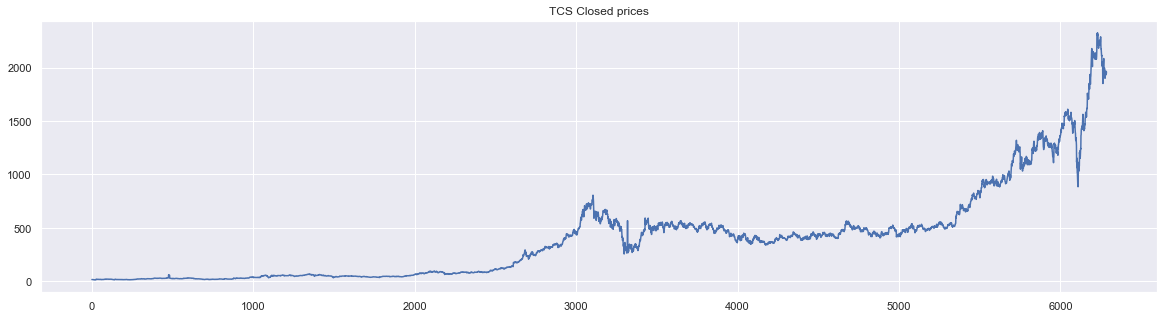

In [8]:
df_comp.Close.plot(title="TCS Closed prices", figsize=(20,5))

In [9]:
import scipy.stats
import pylab

((array([-3.69426394, -3.46244792, -3.33485647, ...,  3.33485647,
          3.46244792,  3.69426394]),
  array([  12.0034  ,   12.0034  ,   12.5306  , ..., 2318.850098,
         2319.75    , 2324.550049])),
 (382.42270094560706, 398.33946220664967, 0.8941906296318091))

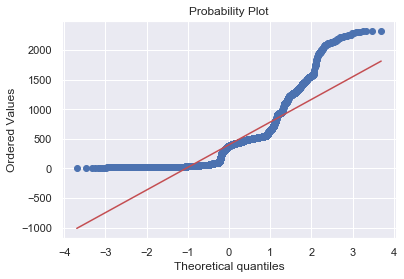

In [10]:
scipy.stats.probplot(df_comp.Close, plot=pylab)

# Length of the time period

In [11]:
df_comp.Date.describe()

count           6286
unique          6286
top       2012-03-06
freq               1
Name: Date, dtype: object

In [12]:
df_comp.Date = pd.to_datetime(df_comp.Date, yearfirst=True)

In [13]:
pd.DatetimeIndex(df_comp['Date']).day

Int64Index([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12,
            ...
            20, 23, 24, 25, 26, 27,  1,  2,  3,  4],
           dtype='int64', name='Date', length=6286)

In [14]:
df_comp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.422041,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.403215,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.421453,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.399085,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.382609,76213503.0


In [15]:
df_comp.Date.describe()

count                    6286
unique                   6286
top       1999-08-23 00:00:00
freq                        1
first     1996-01-01 00:00:00
last      2020-12-04 00:00:00
Name: Date, dtype: object

# Setting the Index

In [16]:
df_comp.set_index("Date", inplace=True)

In [17]:
df_comp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,16.009800,16.095699,15.904300,16.0683,2.422041,47600787.0
1996-01-02,16.029301,16.107401,15.826200,15.9434,2.403215,77143764.0
1996-01-03,16.205000,16.943001,16.029301,16.0644,2.421453,95695836.0
1996-01-04,15.912100,15.962900,15.701300,15.9160,2.399085,99159504.0
1996-01-05,15.853600,15.853600,15.670000,15.8067,2.382609,76213503.0


# Setting the Frequency

In [18]:
df_comp = df_comp.asfreq('b')

In [19]:
df_comp.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,16.009800,16.095699,15.904300,16.0683,2.422041,47600787.0
1996-01-02,16.029301,16.107401,15.826200,15.9434,2.403215,77143764.0
1996-01-03,16.205000,16.943001,16.029301,16.0644,2.421453,95695836.0
1996-01-04,15.912100,15.962900,15.701300,15.9160,2.399085,99159504.0
1996-01-05,15.853600,15.853600,15.670000,15.8067,2.382609,76213503.0
1996-01-08,15.775500,15.787200,15.017900,15.1741,2.287255,85478335.0
1996-01-09,14.725100,14.994500,14.233100,14.7368,2.221339,177730990.0
1996-01-10,14.447800,14.795400,14.291600,14.3580,2.164241,126455257.0
1996-01-11,14.213500,14.877400,14.194000,14.8071,2.231935,187276245.0


# Handling Missing Values

In [20]:
df_comp.isna().sum()

Open         346
High         346
Low          346
Close        228
Adj Close    346
Volume       346
dtype: int64

In [21]:
df_comp.Close = df_comp.Close.fillna(method = "ffill")

In [22]:
df_comp.isna().sum()

Open         346
High         346
Low          346
Close          0
Adj Close    346
Volume       346
dtype: int64

# Simplifying the dataset

In [23]:
df_comp['market_value'] = df_comp.Close

In [24]:
df_comp.describe()

,Open,High,Low,Close,Adj Close,Volume,market_value
count,6159.000000,6159.000000,6159.000000,6505.000000,6159.000000,6.159000e+03,6505.000000
mean,404.852116,410.114954,399.113501,405.191388,370.327018,3.114375e+07,405.191388
std,429.090392,434.287063,423.174441,427.262980,430.639873,4.985330e+07,427.262980
min,11.948700,12.557900,11.874600,12.003400,1.809322,0.000000e+00,12.003400
25%,50.610399,51.543598,49.509251,50.723598,24.408780,7.279784e+06,50.723598
50%,387.649994,393.000000,382.000000,389.799988,337.869049,1.390323e+07,389.799988
75%,517.000000,523.075012,510.100006,516.375000,466.095154,3.365020e+07,516.375000
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.623833e+08,2324.550049


In [25]:
del df_comp['Open'], df_comp['High'], df_comp['Low'], df_comp['Close'], df_comp['Adj Close'], df_comp['Volume']

In [26]:
df_comp.describe()

,market_value
count,6505.000000
mean,405.191388
std,427.262980
min,12.003400
25%,50.723598
50%,389.799988
75%,516.375000
max,2324.550049


# Splitting the data

In [27]:
size = int(len(df_comp)*0.8)

In [28]:
size

5204

In [29]:
df = df_comp.iloc[:size]

In [30]:
df_test = df_comp.iloc[size:]

In [31]:
df.tail()

,market_value
Date,
2015-12-04,482.725006
2015-12-07,476.024994
2015-12-08,470.450012
2015-12-09,457.950012
2015-12-10,475.174988


In [32]:
df_test.head()

,market_value
Date,
2015-12-11,476.475006
2015-12-14,477.549988
2015-12-15,487.950012
2015-12-16,489.325012
2015-12-17,504.850006


# White Noise

In [33]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [34]:
df['wn'] = wn

C:\Users\intal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df.describe()

,market_value,wn
count,5204.000000,5204.000000
mean,244.013472,245.080117
std,211.119798,209.083792
min,12.003400,-449.645701
25%,44.444698,102.505647
50%,134.489502,244.546993
75%,441.624992,386.431767
max,805.213013,1032.732653


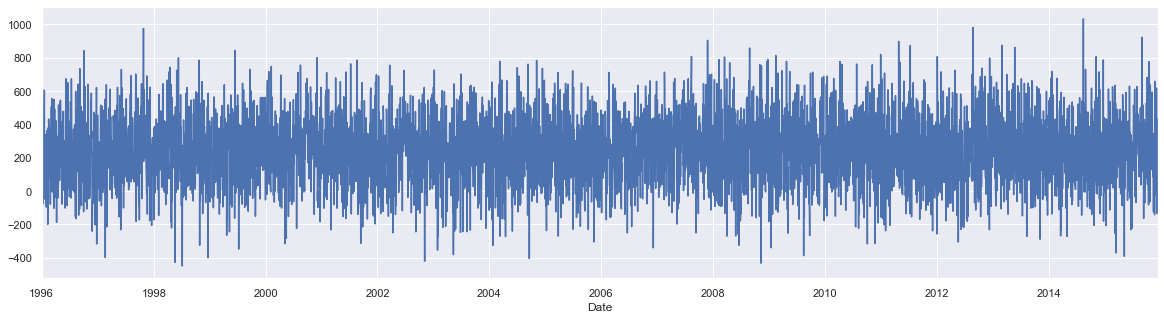

In [36]:
 df.wn.plot(figsize=(20,5))

(0, 2300)

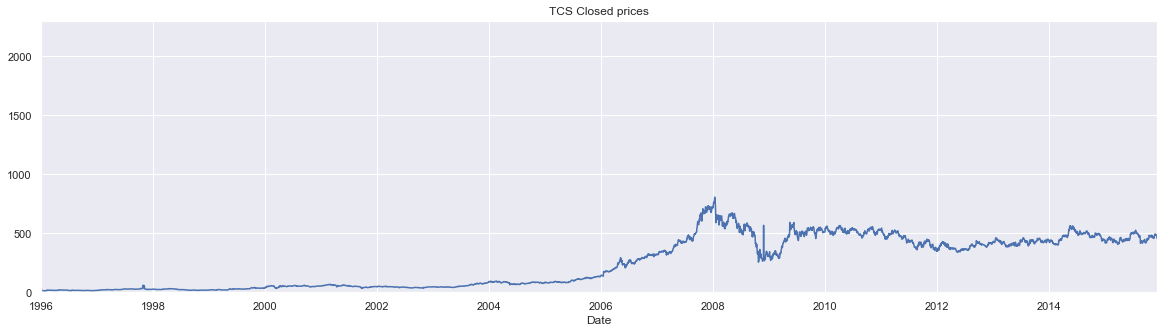

In [37]:
df.market_value.plot(title="TCS Closed prices", figsize=(20,5))
plt.ylim(0,2300)

# Random Walk

In [38]:
rw = pd.read_csv("individual_stocks/RandWalk.csv")

In [39]:
rw.date = pd.to_datetime(rw.date, dayfirst=True)

In [40]:
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [41]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [42]:
rw.price.isnull().sum()

0

In [43]:
df['rw'] = rw.price

C:\Users\intal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df.head()

,market_value,wn,rw
Date,,,
1996-01-01,16.0683,194.176174,601.892762
1996-01-02,15.9434,234.251830,598.521406
1996-01-03,16.0644,-77.937449,593.543244
1996-01-04,15.9160,-105.697761,601.605236
1996-01-05,15.8067,125.988338,610.664510


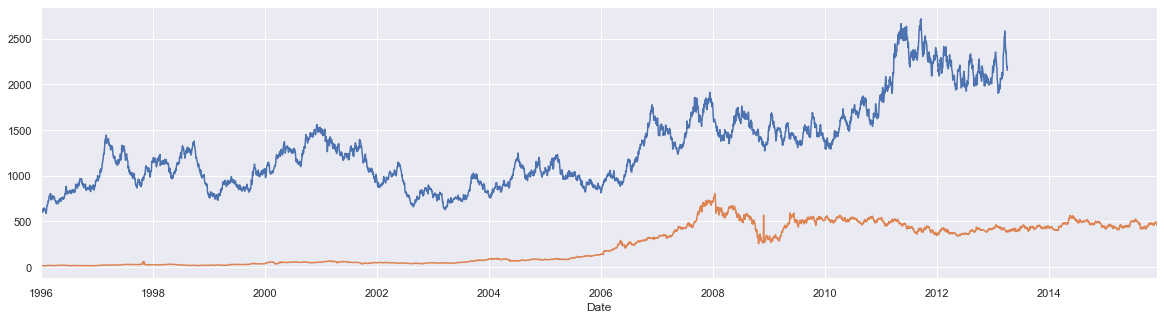

In [45]:
df.rw.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))

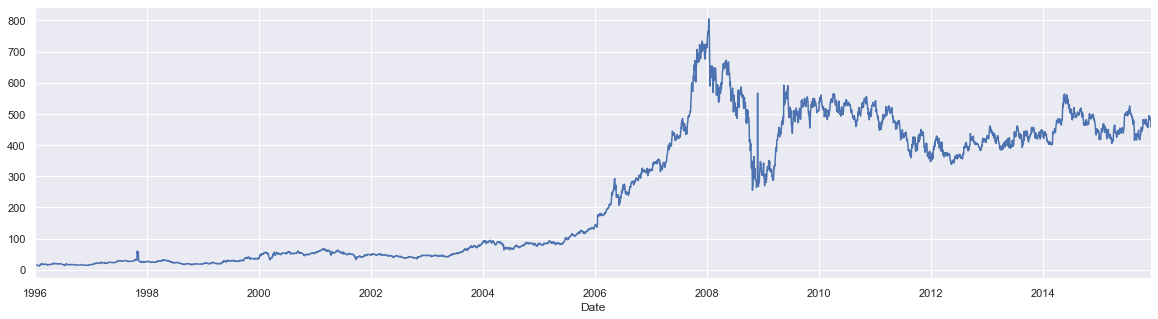

In [46]:
df.market_value.plot(figsize = (20,5))

# Stationarity (Dickey-Fuller test)

In [47]:
import statsmodels.tsa.stattools as sts

In [48]:
sts.adfuller(df.market_value)

(-1.1886918892971148,
 0.6784411611124346,
 32,
 5171,
 {'1%': -3.4316152386678156,
  '5%': -2.8620991027450327,
  '10%': -2.5670676103697185},
 37033.2087468979)

In [49]:
sts.adfuller(df.wn)

(-72.89239936562292,
 0.0,
 0,
 5203,
 {'1%': -3.431607453228881,
  '5%': -2.862095663125188,
  '10%': -2.56706577933516},
 69923.32289374102)

In [50]:
#sts.adfuller(df.rw)

# Seasonality

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

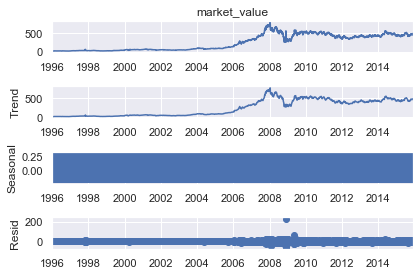

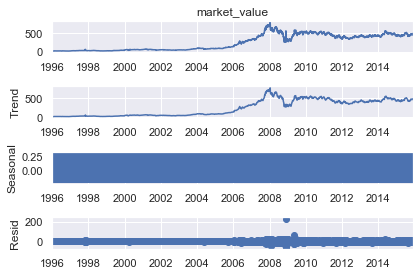

In [52]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()

# ACF

In [53]:
import statsmodels.graphics.tsaplots as sgt

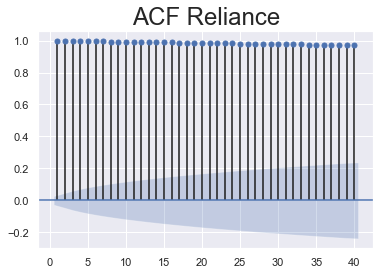

In [54]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF Reliance", size = 24)
plt.show()

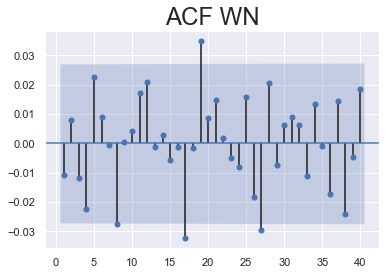

In [55]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

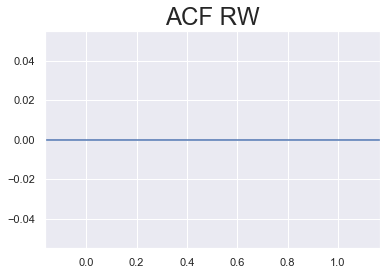

In [56]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

# PACF

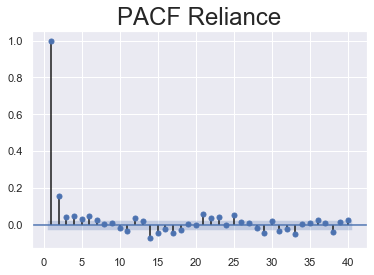

In [57]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, alpha=0.05,method = ('ols'))
plt.title("PACF Reliance", size = 24)
plt.show()

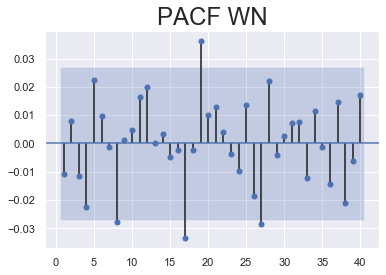

In [58]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

In [59]:
#sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
#plt.title("PACF RW", size = 24)
#plt.show()

# The AR(1) Model

In [60]:
from statsmodels.tsa.arima_model import ARMA

In [61]:
model_ar = ARMA(df.market_value, order = (1,0))

In [62]:
results_ar = model_ar.fit()

In [63]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(1, 0)   Log Likelihood              -18756.986
Method:                       css-mle   S.D. of innovations              8.889
Date:                Thu, 14 Jan 2021   AIC                          37519.973
Time:                        19:12:48   BIC                          37539.644
Sample:                    01-01-1996   HQIC                         37526.853
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                244.3773    119.337      2.048      0.041      10.482     478.273
ar.L1.market_value     0.9991      0.001   1899.029      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

# Higher Lag AR models

In [64]:
model_ar_2 = ARMA(df.market_value, order = (2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(2, 0)   Log Likelihood              -18691.555
Method:                       css-mle   S.D. of innovations              8.778
Date:                Thu, 14 Jan 2021   AIC                          37391.110
Time:                        19:12:49   BIC                          37417.339
Sample:                    01-01-1996   HQIC                         37400.285
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                242.3103    133.184      1.819      0.069     -18.725     503.346
ar.L1.market_value     0.8416      0.014     62.010      0.000       0.815       0.868
ar.L2.market_value     0.1576      0.014     11.613      0.000       0.131       0.184
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
AR.2           -6.3394           +0.0000j            6.3394            0.5000
-----------------------------------------------------------------------------
"""

In [65]:
model_ar_3 = ARMA(df.market_value, order = (3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(3, 0)   Log Likelihood              -18687.323
Method:                       css-mle   S.D. of innovations              8.771
Date:                Thu, 14 Jan 2021   AIC                          37384.645
Time:                        19:12:51   BIC                          37417.431
Sample:                    01-01-1996   HQIC                         37396.113
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                244.9512    136.731      1.791      0.073     -23.037     512.939
ar.L1.market_value     0.8353      0.014     60.941      0.000       0.808       0.862
ar.L2.market_value     0.1237      0.018      6.909      0.000       0.089       0.159
ar.L3.market_value     0.0403      0.014      2.912      0.004       0.013       0.067
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           -0.0000j            1.0006           -0.0000
AR.2           -2.0336           -4.5436j            4.9780           -0.3170
AR.3           -2.0336           +4.5436j            4.9780            0.3170
-----------------------------------------------------------------------------
"""

In [66]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(4, 0)   Log Likelihood              -18681.284
Method:                       css-mle   S.D. of innovations              8.760
Date:                Thu, 14 Jan 2021   AIC                          37374.568
Time:                        19:12:54   BIC                          37413.911
Sample:                    01-01-1996   HQIC                         37388.330
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                245.7611    140.993      1.743      0.081     -30.579     522.101
ar.L1.market_value     0.8334      0.014     60.969      0.000       0.807       0.860
ar.L2.market_value     0.1177      0.018      6.560      0.000       0.083       0.153
ar.L3.market_value  8.465e-05      0.018      0.005      0.996      -0.035       0.035
ar.L4.market_value     0.0482      0.014      3.477      0.001       0.021       0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2           -2.6524           -0.0000j            2.6524           -0.5000
AR.3            0.8251           -2.6727j            2.7972           -0.2023
AR.4            0.8251           +2.6727j            2.7972            0.2023
-----------------------------------------------------------------------------
"""

# LLR Test

In [67]:
from scipy.stats.distributions import chi2

In [68]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

# Comparing higher-lag AR models

In [69]:
LLR_test(model_ar, model_ar_2)

0.0

In [70]:
LLR_test(model_ar_2, model_ar_3)

0.004

In [71]:
LLR_test(model_ar_3, model_ar_4)

0.001

In [72]:
model_ar_4 = ARMA(df.market_value, order = (4,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())
print("LLR Test: " + str(LLR_test(model_ar_3, model_ar_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(4, 0)   Log Likelihood              -18681.284
Method:                       css-mle   S.D. of innovations              8.760
Date:                Thu, 14 Jan 2021   AIC                          37374.568
Time:                        19:13:05   BIC                          37413.911
Sample:                    01-01-1996   HQIC                         37388.330
                         - 12-10-2015                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                245.7611    140.993      1.743      0.081     -30.579     522.101
ar.L1.market_value     0.8334      0.014     60.969      0.000       0.807       0.860
ar.L2.market_value  

In [73]:
model_ar_5 = ARMA(df.market_value, order = (5,0))
results_ar_5 = model_ar_5.fit()
results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(5, 0)   Log Likelihood              -18678.678
Method:                       css-mle   S.D. of innovations              8.756
Date:                Thu, 14 Jan 2021   AIC                          37371.355
Time:                        19:13:12   BIC                          37417.256
Sample:                    01-01-1996   HQIC                         37387.410
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                243.3736    143.829      1.692      0.091     -38.526     525.273
ar.L1.market_value     0.8319      0.014     60.933      0.000       0.805       0.859
ar.L2.market_value     0.1177      0.018      6.568      0.000       0.083       0.153
ar.L3.market_value    -0.0036      0.018     -0.201      0.841      -0.039       0.032
ar.L4.market_value     0.0218      0.018      1.208      0.227      -0.014       0.057
ar.L5.market_value     0.0317      0.014      2.284      0.022       0.004       0.059
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           -0.0000j            1.0005           -0.0000
AR.2            1.1945           -1.8901j            2.2359           -0.1603
AR.3            1.1945           +1.8901j            2.2359            0.1603
AR.4           -2.0388           -1.4697j            2.5133           -0.4006
AR.5           -2.0388           +1.4697j            2.5133            0.4006
-----------------------------------------------------------------------------
"""

In [74]:
model_ar_6 = ARMA(df.market_value, order = (6,0))
results_ar_6 = model_ar_6.fit()
results_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(6, 0)   Log Likelihood              -18672.717
Method:                       css-mle   S.D. of innovations              8.746
Date:                Thu, 14 Jan 2021   AIC                          37361.433
Time:                        19:13:16   BIC                          37413.891
Sample:                    01-01-1996   HQIC                         37379.782
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                244.7377    148.122      1.652      0.098     -45.575     535.051
ar.L1.market_value     0.8304      0.014     61.070      0.000       0.804       0.857
ar.L2.market_value     0.1167      0.018      6.524      0.000       0.082       0.152
ar.L3.market_value    -0.0035      0.018     -0.192      0.848      -0.039       0.032
ar.L4.market_value     0.0162      0.018      0.893      0.372      -0.019       0.052
ar.L5.market_value    -0.0081      0.018     -0.452      0.651      -0.043       0.027
ar.L6.market_value     0.0479      0.014      3.455      0.001       0.021       0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.2549           -1.2559j            1.7754           -0.1251
AR.3            1.2549           +1.2559j            1.7754            0.1251
AR.4           -1.8240           -0.0000j            1.8240           -0.5000
AR.5           -0.7579           -1.7490j            1.9061           -0.3151
AR.6           -0.7579           +1.7490j            1.9061            0.3151
-----------------------------------------------------------------------------
"""

In [75]:
LLR_test(model_ar_4, model_ar_5)

0.022

In [76]:
LLR_test(model_ar_5, model_ar_6)

0.001

In [77]:
model_ar_7 = ARMA(df.market_value, order = (7,0))
results_ar_7 = model_ar_7.fit()
results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(7, 0)   Log Likelihood              -18670.663
Method:                       css-mle   S.D. of innovations              8.742
Date:                Thu, 14 Jan 2021   AIC                          37359.326
Time:                        19:13:32   BIC                          37418.340
Sample:                    01-01-1996   HQIC                         37379.967
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                247.6051    150.352      1.647      0.100     -47.080     542.290
ar.L1.market_value     0.8290      0.014     61.056      0.000       0.802       0.856
ar.L2.market_value     0.1168      0.018      6.540      0.000       0.082       0.152
ar.L3.market_value    -0.0039      0.018     -0.214      0.830      -0.039       0.032
ar.L4.market_value     0.0163      0.018      0.900      0.368      -0.019       0.052
ar.L5.market_value    -0.0114      0.018     -0.630      0.529      -0.047       0.024
ar.L6.market_value     0.0245      0.018      1.364      0.173      -0.011       0.060
ar.L7.market_value     0.0280      0.014      2.022      0.043       0.001       0.055
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.2531           -1.0414j            1.6293           -0.1104
AR.3            1.2531           +1.0414j            1.6293            0.1104
AR.4           -0.3254           -1.7885j            1.8178           -0.2786
AR.5           -0.3254           +1.7885j            1.8178            0.2786
AR.6           -1.8659           -0.7649j            2.0166           -0.4381
AR.7           -1.8659           +0.7649j            2.0166            0.4381
-----------------------------------------------------------------------------
"""

In [78]:
LLR_test(model_ar_6, model_ar_7)

0.043

In [79]:
model_ar_8 = ARMA(df.market_value, order = (8,0))
results_ar_8 = model_ar_8.fit()
results_ar_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5204
Model:                     ARMA(8, 0)   Log Likelihood              -18670.632
Method:                       css-mle   S.D. of innovations              8.742
Date:                Thu, 14 Jan 2021   AIC                          37361.263
Time:                        19:13:49   BIC                          37426.835
Sample:                    01-01-1996   HQIC                         37384.199
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                246.8189    150.965      1.635      0.102     -49.067     542.704
ar.L1.market_value     0.8289      0.014     61.056      0.000       0.802       0.856
ar.L2.market_value     0.1168      0.018      6.541      0.000       0.082       0.152
ar.L3.market_value    -0.0039      0.018     -0.215      0.830      -0.039       0.032
ar.L4.market_value     0.0162      0.018      0.896      0.370      -0.019       0.052
ar.L5.market_value    -0.0114      0.018     -0.631      0.528      -0.047       0.024
ar.L6.market_value     0.0241      0.018      1.334      0.182      -0.011       0.060
ar.L7.market_value     0.0252      0.018      1.402      0.161      -0.010       0.061
ar.L8.market_value     0.0035      0.014      0.249      0.803      -0.024       0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           -0.0000j            1.0004           -0.0000
AR.2            1.2617           -1.0131j            1.6181           -0.1077
AR.3            1.2617           +1.0131j            1.6181            0.1077
AR.4           -0.2763           -1.8510j            1.8715           -0.2736
AR.5           -0.2763           +1.8510j            1.8715            0.2736
AR.6           -2.1193           -0.8567j            2.2859           -0.4389
AR.7           -2.1193           +0.8567j            2.2859            0.4389
AR.8           -6.0413           -0.0000j            6.0413           -0.5000
-----------------------------------------------------------------------------
"""

In [80]:
LLR_test(model_ar_7, model_ar_8)

0.803

In [81]:
print("LLR test: " + str(LLR_test(model_ar, model_ar_7, DF = 6)))

LLR test: 0.0


 # The DF-Test

In [82]:
sts.adfuller(df.market_value)

(-1.1886918892971148,
 0.6784411611124346,
 32,
 5171,
 {'1%': -3.4316152386678156,
  '5%': -2.8620991027450327,
  '10%': -2.5670676103697185},
 37033.2087468979)

# Using Returns

In [83]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

C:\Users\intal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
df.head()

,market_value,wn,rw,returns
Date,,,,
1996-01-02,15.9434,234.251830,598.521406,-0.777307
1996-01-03,16.0644,-77.937449,593.543244,0.758935
1996-01-04,15.9160,-105.697761,601.605236,-0.923782
1996-01-05,15.8067,125.988338,610.664510,-0.686730
1996-01-08,15.1741,214.798309,632.549794,-4.002100


In [85]:
sts.adfuller(df.returns)

(-16.689174275406845,
 1.493573287034373e-29,
 23,
 5179,
 {'1%': -3.4316132832839794,
  '5%': -2.862098238854054,
  '10%': -2.5670671504890326},
 26447.12287072286)

# ACF and PACF for returns

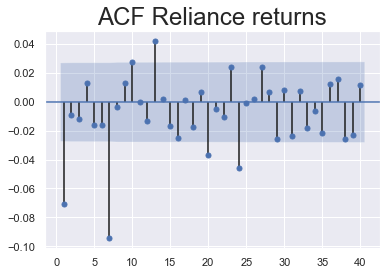

In [86]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF Reliance returns", size=24)
plt.show()

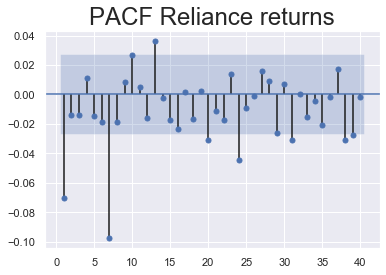

In [87]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method=('ols'))
plt.title("PACF Reliance returns", size=24)
plt.show()

# AR(1) for Returns

In [88]:
model_ret_ar_1 = ARMA(df.returns, order=(1,0))
results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(1, 0)   Log Likelihood              -13354.500
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26714.999
Time:                        19:14:10   BIC                          26734.670
Sample:                    01-02-1996   HQIC                         26721.880
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.041      2.713      0.007       0.031       0.191
ar.L1.returns    -0.0705      0.014     -5.094      0.000      -0.098      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.1945           +0.0000j           14.1945            0.5000
-----------------------------------------------------------------------------
"""

# Higher-Lag AR Models for Returns

In [89]:
model_ret_ar_2 = ARMA(df.returns, order=(2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(2, 0)   Log Likelihood              -13353.993
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26715.987
Time:                        19:14:10   BIC                          26742.215
Sample:                    01-02-1996   HQIC                         26725.161
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.751      0.006       0.032       0.190
ar.L1.returns    -0.0714      0.014     -5.153      0.000      -0.099      -0.044
ar.L2.returns    -0.0139      0.014     -1.006      0.314      -0.041       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.5603           -8.0705j            8.4669           -0.2989
AR.2           -2.5603           +8.0705j            8.4669            0.2989
-----------------------------------------------------------------------------
"""

In [90]:
LLR_test(model_ret_ar_1, model_ret_ar_2)

0.314

In [91]:
model_ret_ar_3 = ARMA(df.returns, order=(3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(3, 0)   Log Likelihood              -13353.498
Method:                       css-mle   S.D. of innovations              3.150
Date:                Thu, 14 Jan 2021   AIC                          26716.996
Time:                        19:14:11   BIC                          26749.781
Sample:                    01-02-1996   HQIC                         26728.464
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.789      0.005       0.033       0.189
ar.L1.returns    -0.0716      0.014     -5.167      0.000      -0.099      -0.044
ar.L2.returns    -0.0149      0.014     -1.075      0.283      -0.042       0.012
ar.L3.returns    -0.0138      0.014     -0.995      0.320      -0.041       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.1104           -0.0000j            4.1104           -0.5000
AR.2            1.5139           -3.9174j            4.1997           -0.1913
AR.3            1.5139           +3.9174j            4.1997            0.1913
-----------------------------------------------------------------------------
"""

In [92]:
LLR_test(model_ret_ar_2, model_ret_ar_3)

0.32

In [93]:
model_ret_ar_4 = ARMA(df.returns, order=(4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(4, 0)   Log Likelihood              -13353.164
Method:                       css-mle   S.D. of innovations              3.150
Date:                Thu, 14 Jan 2021   AIC                          26718.328
Time:                        19:14:11   BIC                          26757.670
Sample:                    01-02-1996   HQIC                         26732.089
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.758      0.006       0.032       0.189
ar.L1.returns    -0.0715      0.014     -5.155      0.000      -0.099      -0.044
ar.L2.returns    -0.0148      0.014     -1.062      0.288      -0.042       0.012
ar.L3.returns    -0.0130      0.014     -0.934      0.350      -0.040       0.014
ar.L4.returns     0.0113      0.014      0.817      0.414      -0.016       0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7477           -0.0000j            2.7477           -0.5000
AR.2            0.0966           -2.9448j            2.9463           -0.2448
AR.3            0.0966           +2.9448j            2.9463            0.2448
AR.4            3.7006           -0.0000j            3.7006           -0.0000
-----------------------------------------------------------------------------
"""

In [94]:
LLR_test(model_ret_ar_3, model_ret_ar_4)

0.414

In [95]:
model_ret_ar_6 = ARMA(df.returns, order=(6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(6, 0)   Log Likelihood              -13351.701
Method:                       css-mle   S.D. of innovations              3.149
Date:                Thu, 14 Jan 2021   AIC                          26719.401
Time:                        19:14:12   BIC                          26771.857
Sample:                    01-02-1996   HQIC                         26737.749
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.039      2.853      0.004       0.035       0.187
ar.L1.returns    -0.0716      0.014     -5.163      0.000      -0.099      -0.044
ar.L2.returns    -0.0148      0.014     -1.063      0.288      -0.042       0.012
ar.L3.returns    -0.0134      0.014     -0.968      0.333      -0.041       0.014
ar.L4.returns     0.0100      0.014      0.719      0.472      -0.017       0.037
ar.L5.returns    -0.0161      0.014     -1.161      0.246      -0.043       0.011
ar.L6.returns    -0.0185      0.014     -1.337      0.181      -0.046       0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5978           -1.0211j            1.8962           -0.0905
AR.2            1.5978           +1.0211j            1.8962            0.0905
AR.3           -0.1411           -1.8625j            1.8679           -0.2620
AR.4           -0.1411           +1.8625j            1.8679            0.2620
AR.5           -1.8921           -0.8502j            2.0744           -0.4328
AR.6           -1.8921           +0.8502j            2.0744            0.4328
-----------------------------------------------------------------------------
"""

In [96]:
model_ret_ar_7 = ARMA(df.returns, order=(7,0))
results_ret_ar_7 = model_ret_ar_7.fit()
results_ret_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(7, 0)   Log Likelihood              -13326.729
Method:                       css-mle   S.D. of innovations              3.134
Date:                Thu, 14 Jan 2021   AIC                          26671.458
Time:                        19:14:14   BIC                          26730.471
Sample:                    01-02-1996   HQIC                         26692.100
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1110      0.035      3.153      0.002       0.042       0.180
ar.L1.returns    -0.0734      0.014     -5.320      0.000      -0.100      -0.046
ar.L2.returns    -0.0163      0.014     -1.181      0.237      -0.043       0.011
ar.L3.returns    -0.0125      0.014     -0.902      0.367      -0.040       0.015
ar.L4.returns     0.0087      0.014      0.627      0.531      -0.018       0.036
ar.L5.returns    -0.0176      0.014     -1.274      0.203      -0.045       0.009
ar.L6.returns    -0.0256      0.014     -1.849      0.064      -0.053       0.002
ar.L7.returns    -0.0977      0.014     -7.084      0.000      -0.125      -0.071
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2217           -0.6321j            1.3755           -0.0760
AR.2            1.2217           +0.6321j            1.3755            0.0760
AR.3            0.2442           -1.3687j            1.3903           -0.2219
AR.4            0.2442           +1.3687j            1.3903            0.2219
AR.5           -1.3850           -0.0000j            1.3850           -0.5000
AR.6           -0.9042           -1.0964j            1.4212           -0.3598
AR.7           -0.9042           +1.0964j            1.4212            0.3598
-----------------------------------------------------------------------------
"""

In [97]:
LLR_test(model_ret_ar_1, model_ret_ar_7, DF = 6)

0.0

In [98]:
model_ret_ar_13 =ARMA(df.returns, order=(13,0))
results_ret_ar_13 = model_ret_ar_13.fit()
results_ret_ar_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                    ARMA(13, 0)   Log Likelihood              -13319.600
Method:                       css-mle   S.D. of innovations              3.130
Date:                Thu, 14 Jan 2021   AIC                          26669.200
Time:                        19:14:23   BIC                          26767.554
Sample:                    01-02-1996   HQIC                         26703.602
                         - 12-10-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1109      0.037      3.019      0.003       0.039       0.183
ar.L1.returns     -0.0748      0.014     -5.398      0.000      -0.102      -0.048
ar.L2.returns     -0.0153      0.014     -1.099      0.272      -0.042       0.012
ar.L3.returns     -0.0106      0.014     -0.766      0.444      -0.038       0.017
ar.L4.returns      0.0095      0.014      0.686      0.492      -0.018       0.037
ar.L5.returns     -0.0182      0.014     -1.312      0.190      -0.045       0.009
ar.L6.returns     -0.0227      0.014     -1.634      0.102      -0.050       0.005
ar.L7.returns     -0.0980      0.014     -7.087      0.000      -0.125      -0.071
ar.L8.returns     -0.0168      0.014     -1.210      0.226      -0.044       0.010
ar.L9.returns      0.0101      0.014      0.725      0.468      -0.017       0.037
ar.L10.returns     0.0272      0.014      1.958      0.050   -3.12e-05       0.054
ar.L11.returns     0.0046      0.014      0.328      0.743      -0.023       0.032
ar.L12.returns    -0.0129      0.014     -0.932      0.351      -0.040       0.014
ar.L13.returns     0.0364      0.014      2.630      0.009       0.009       0.064
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2433           -0.2561j            1.2694           -0.4677
AR.2            -1.2433           +0.2561j            1.2694            0.4677
AR.3            -0.9175           -0.8505j            1.2511           -0.3810
AR.4            -0.9175           +0.8505j            1.2511            0.3810
AR.5            -0.4601           -1.1876j            1.2736           -0.3088
AR.6            -0.4601           +1.1876j            1.2736            0.3088
AR.7             0.2207           -1.2152j            1.2351           -0.2214
AR.8             0.2207           +1.2152j            1.2351            0.2214
AR.9             1.3630           -0.0000j            1.3630           -0.0000
AR.10            1.0866           -0.5979j            1.2403           -0.0801
AR.11            1.0866           +0.5979j            1.2403            0.0801
AR.12            0.8098           -1.2007j            1.4482           -0.1556
AR.13            0.8098           +1.2007j            1.4482            0.1556
------------------------------------------------------------------------------
"""

In [99]:
LLR_test(model_ret_ar_7, model_ret_ar_13, DF = 6)

0.027

# Normalizing Values

In [100]:
benchmark = df.market_value.iloc[0]

In [101]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [102]:
sts.adfuller(df.norm)

(-1.1894476607523583,
 0.6781185096217529,
 32,
 5170,
 {'1%': -3.4316154835165014,
  '5%': -2.8620992109194425,
  '10%': -2.5670676679549103},
 56008.912908389815)

# Normalizing Returns

In [103]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-16.68917427540683,
 1.4935732870343946e-29,
 23,
 5179,
 {'1%': -3.4316132832839794,
  '5%': -2.862098238854054,
  '10%': -2.5670671504890326},
 76659.72186305586)

In [104]:
model_norm_ret_ar_1 = ARMA(df.norm_ret, order = (1,0))
results_norm_ret_ar_1 = model_norm_ret_ar_1.fit()
results_norm_ret_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5203
Model:                     ARMA(1, 0)   Log Likelihood              -38625.940
Method:                       css-mle   S.D. of innovations            405.388
Date:                Thu, 14 Jan 2021   AIC                          77257.880
Time:                        19:14:41   BIC                          77277.551
Sample:                    01-02-1996   HQIC                         77264.761
                         - 12-10-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -14.2489      5.250     -2.714      0.007     -24.539      -3.959
ar.L1.norm_ret    -0.0704      0.014     -5.094      0.000      -0.098      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.1945           +0.0000j           14.1945            0.5000
-----------------------------------------------------------------------------
"""

In [105]:
# Normalizing does not affect stationarity.
# Normalizing does not have any effect on model selection. The same model that failed for regular returns would also fail for normalized returns.

# Analysing the Residuals for Prices

In [106]:
df['res_price'] = results_ar_7.resid

In [107]:
df.head()

,market_value,wn,rw,returns,norm,norm_ret,res_price
Date,,,,,,,
1996-01-02,15.9434,234.251830,598.521406,-0.777307,100.000000,100.000000,-0.319864
1996-01-03,16.0644,-77.937449,593.543244,0.758935,100.758935,-97.636437,-0.063013
1996-01-04,15.9160,-105.697761,601.605236,-0.923782,99.828142,118.843897,-0.291217
1996-01-05,15.8067,125.988338,610.664510,-0.686730,99.142592,88.347390,-0.284211
1996-01-08,15.1741,214.798309,632.549794,-4.002100,95.174806,514.867490,-0.801223


In [108]:
df.res_price.mean()

0.12134705881759518

In [109]:
df.res_price.var()

76.42847269368347

In [110]:
sts.adfuller(df.res_price)

(-11.64150933334674,
 2.1413873156819595e-21,
 31,
 5171,
 {'1%': -3.4316152386678156,
  '5%': -2.8620991027450327,
  '10%': -2.5670676103697185},
 37027.3227861275)

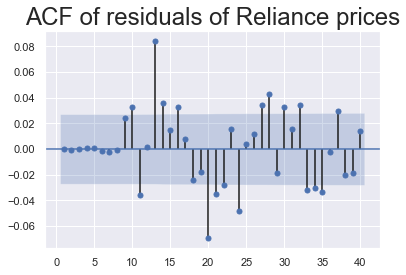

In [111]:
sgt.plot_acf(df.res_price, lags = 40, zero = False)
plt.title("ACF of residuals of Reliance prices", size=24)
plt.show()

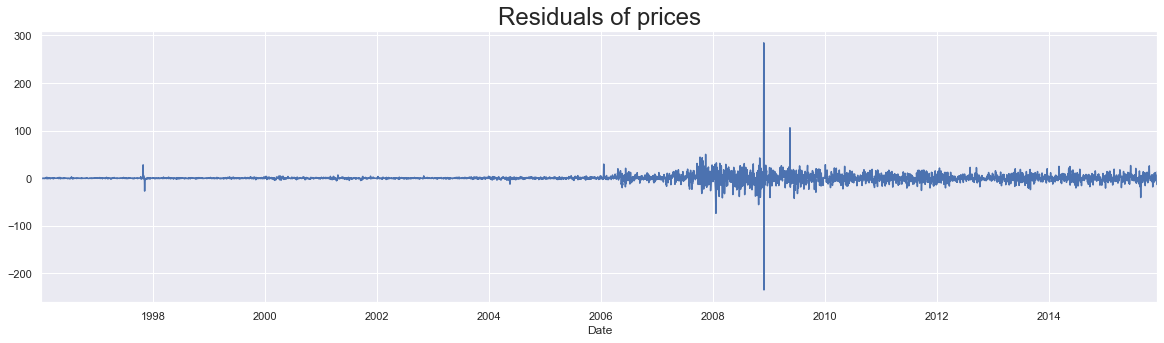

In [112]:
df.res_price.plot(figsize=(20,5))
plt.title("Residuals of prices", size=24)
plt.show()

# Analysing the Residuals for Returns

In [113]:
df['res_ret'] = results_ret_ar_7.resid

In [114]:
df.res_ret.mean()

-0.0002945603342597196

In [115]:
df.res_ret.var()

9.825862276910373

In [116]:
sts.adfuller(df.res_ret)

(-72.2359985091055,
 0.0,
 0,
 5202,
 {'1%': -3.4316076950732763,
  '5%': -2.862095769972579,
  '10%': -2.5670658362138834},
 26439.879404846175)

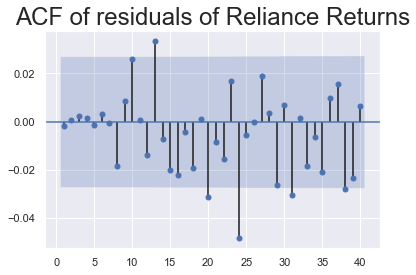

In [117]:
sgt.plot_acf(df.res_ret, lags = 40, zero = False)
plt.title("ACF of residuals of Reliance Returns", size=24)
plt.show()

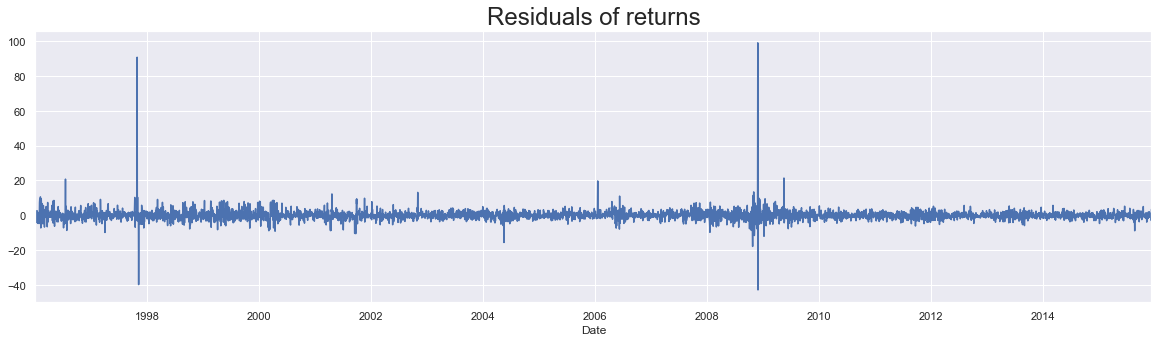

In [118]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of returns", size=24)
plt.show()

# ACF for Returns

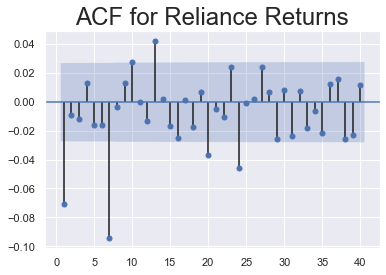

In [119]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title("ACF for Reliance Returns", size=24)
plt.show()

In [120]:
sts.adfuller(df.returns)

(-16.689174275406845,
 1.493573287034373e-29,
 23,
 5179,
 {'1%': -3.4316132832839794,
  '5%': -2.862098238854054,
  '10%': -2.5670671504890326},
 26447.12287072286)

# MA(1) for Returns

In [121]:
model_ret_ma_1 = ARMA(df.returns, order = (0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 1)   Log Likelihood              -13354.173
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26714.346
Time:                        19:14:46   BIC                          26734.017
Sample:                    01-02-1996   HQIC                         26721.226
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.041      2.732      0.006       0.031       0.190
ma.L1.returns    -0.0723      0.014     -5.168      0.000      -0.100      -0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           13.8355           +0.0000j           13.8355            0.0000
-----------------------------------------------------------------------------
"""

# Higher-Lag MA Models for Returns

In [122]:
model_ret_ma_2 = ARMA(df.returns, order = (0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 2)   Log Likelihood              -13353.889
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26715.778
Time:                        19:14:46   BIC                          26742.006
Sample:                    01-02-1996   HQIC                         26724.952
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.762      0.006       0.032       0.189
ma.L1.returns    -0.0717      0.014     -5.178      0.000      -0.099      -0.045
ma.L2.returns    -0.0104      0.014     

In [123]:
model_ret_ma_3 = ARMA(df.returns, order = (0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 3)   Log Likelihood              -13353.547
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26717.093
Time:                        19:14:47   BIC                          26749.878
Sample:                    01-02-1996   HQIC                         26728.561
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.796      0.005       0.033       0.188
ma.L1.returns    -0.0714      0.014     -5.151      0.000      -0.099      -0.044
ma.L2.returns    -0.0101      0.014     

In [124]:
model_ret_ma_4 = ARMA(df.returns, order = (0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 4)   Log Likelihood              -13353.392
Method:                       css-mle   S.D. of innovations              3.150
Date:                Thu, 14 Jan 2021   AIC                          26718.783
Time:                        19:14:49   BIC                          26758.125
Sample:                    01-02-1996   HQIC                         26732.544
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.767      0.006       0.032       0.189
ma.L1.returns    -0.0712      0.014     -5.132      0.000      -0.098      -0.044
ma.L2.returns    -0.0097      0.014     

In [125]:
model_ret_ma_5= ARMA(df.returns, order = (0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 5)   Log Likelihood              -13352.132
Method:                       css-mle   S.D. of innovations              3.150
Date:                Thu, 14 Jan 2021   AIC                          26718.263
Time:                        19:14:51   BIC                          26764.162
Sample:                    01-02-1996   HQIC                         26734.318
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.039      2.845      0.004       0.034       0.187
ma.L1.returns    -0.0727      0.014     -5.222      0.000      -0.100      -0.045
ma.L2.returns    -0.0134      0.014     

In [126]:
model_ret_ma_6 = ARMA(df.returns, order = (0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 6)   Log Likelihood              -13349.589
Method:                       css-mle   S.D. of innovations              3.148
Date:                Thu, 14 Jan 2021   AIC                          26715.178
Time:                        19:14:56   BIC                          26767.633
Sample:                    01-02-1996   HQIC                         26733.526
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1108      0.038      2.951      0.003       0.037       0.184
ma.L1.returns    -0.0780      0.014     -5.543      0.000      -0.106      -0.050
ma.L2.returns    -0.0132      0.014     

In [127]:
model_ret_ma_7 = ARMA(df.returns, order = (0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 7)   Log Likelihood              -13326.538
Method:                       css-mle   S.D. of innovations              3.134
Date:                Thu, 14 Jan 2021   AIC                          26671.077
Time:                        19:15:01   BIC                          26730.089
Sample:                    01-02-1996   HQIC                         26691.718
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1111      0.034      3.246      0.001       0.044       0.178
ma.L1.returns    -0.0753      0.014     -5.458      0.000      -0.102      -0.048
ma.L2.returns    -0.0094      0.014     

In [128]:
model_ret_ma_8 = ARMA(df.returns, order = (0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(0, 8)   Log Likelihood              -13326.485
Method:                       css-mle   S.D. of innovations              3.134
Date:                Thu, 14 Jan 2021   AIC                          26672.969
Time:                        19:15:11   BIC                          26738.539
Sample:                    01-02-1996   HQIC                         26695.904
                         - 12-10-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1111      0.034      3.262      0.001       0.044       0.178
ma.L1.returns    -0.0748      0.014     -5.386      0.000      -0.102      -0.048
ma.L2.returns    -0.0091      0.014     

In [129]:
print("LLR test p-value:" + str(LLR_test(model_ret_ma_1, model_ret_ma_7, DF = 6)))

LLR test p-value:0.0


In [130]:
model_ret_ma_10 = ARMA(df.returns, order = (0,10))
results_ret_ma_10 = model_ret_ma_10.fit()
print(results_ret_ma_10.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_7, model_ret_ma_10, DF = 3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                    ARMA(0, 10)   Log Likelihood              -13324.611
Method:                       css-mle   S.D. of innovations              3.133
Date:                Thu, 14 Jan 2021   AIC                          26673.223
Time:                        19:15:25   BIC                          26751.907
Sample:                    01-02-1996   HQIC                         26700.745
                         - 12-10-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1110      0.035      3.127      0.002       0.041       0.181
ma.L1.returns     -0.0748      0.014     -5.399      0.000      -0.102      -0.048
ma.L2.returns     -0.0097      0.014

In [131]:
model_ret_ma_13 = ARMA(df.returns, order = (0,13))
results_ret_ma_13 = model_ret_ma_13.fit()
print(results_ret_ma_13.summary())
print("LLR test p-value:" + str(LLR_test(model_ret_ma_7, model_ret_ma_13, DF = 6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5203
Model:                    ARMA(0, 13)   Log Likelihood              -13321.316
Method:                       css-mle   S.D. of innovations              3.131
Date:                Thu, 14 Jan 2021   AIC                          26672.631
Time:                        19:15:43   BIC                          26770.986
Sample:                    01-02-1996   HQIC                         26707.034
                         - 12-10-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1109      0.037      3.033      0.002       0.039       0.183
ma.L1.returns     -0.0745      0.014     -5.379      0.000      -0.102      -0.047
ma.L2.returns     -0.0083      0.014

In [132]:
# model_ret_ma_7 is the chosen model here

# Residuals for Returns

In [133]:
df['res_ret_ma_7'] = results_ret_ma_7.resid

In [134]:
round(df.res_ret_ma_7.mean(), 3)

-0.0

In [135]:
round(df.res_ret_ma_7.var(), 3)

9.825

In [136]:
from math import sqrt
round(sqrt(df.res_ret_ma_7.var()), 3)

3.135

In [137]:
sts.adfuller(df.res_ret_ma_7)

(-72.07311781238518,
 0.0,
 0,
 5202,
 {'1%': -3.4316076950732763,
  '5%': -2.862095769972579,
  '10%': -2.5670658362138834},
 26439.73839367756)

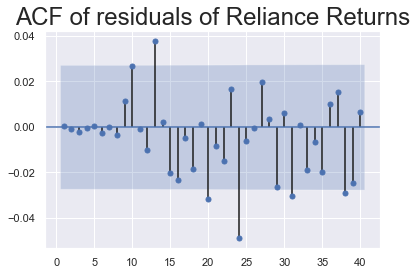

In [138]:
sgt.plot_acf(df.res_ret_ma_7, lags = 40, zero = False)
plt.title("ACF of residuals of Reliance Returns", size=24)
plt.show()

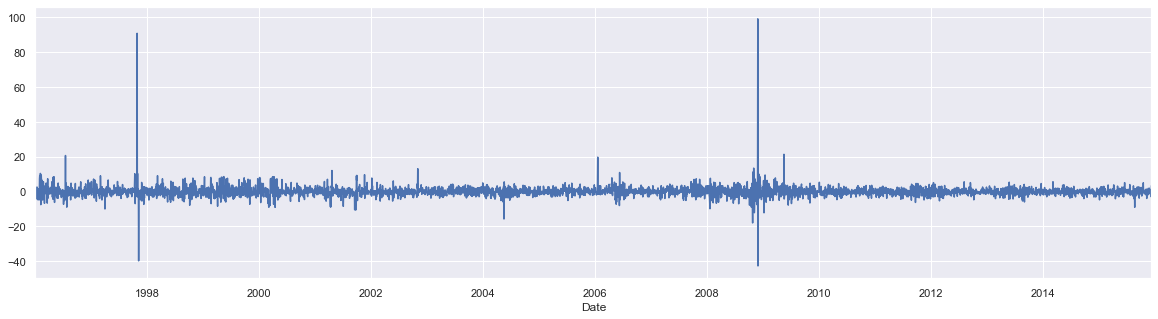

In [139]:
df.res_ret_ma_7.plot(figsize = (20, 5))

# Normalized Returns

In [140]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

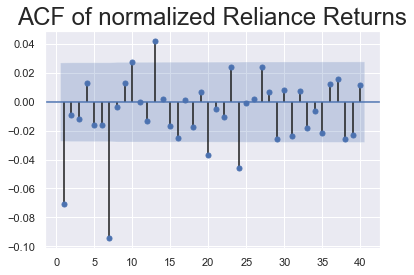

In [141]:
sgt.plot_acf(df.norm_ret, lags = 40, zero = False)
plt.title("ACF of normalized Reliance Returns", size=24)
plt.show()

In [142]:
model_norm_ret_ma_7 = ARMA(df.norm_ret, order = (0,7))
results_norm_ret_ma_7 = model_norm_ret_ma_7.fit()
results_norm_ret_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 5203
Model:                     ARMA(0, 7)   Log Likelihood              -38722.432
Method:                       css-mle   S.D. of innovations            412.973
Date:                Thu, 14 Jan 2021   AIC                          77462.863
Time:                        19:16:10   BIC                          77521.876
Sample:                    01-02-1996   HQIC                         77483.505
                         - 12-10-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.6429      4.510      3.247      0.001       5.804      23.482
ma.L1.norm_ret    -0.0753      0.014     -5.458      0.000      -0.102      -0.048
ma.L2.norm_ret    -0.0094      0.014     -0.680      0.496      -0.037       0.018
ma.L3.norm_ret    -0.0057      0.014     -0.412      0.680      -0.033       0.021
ma.L4.norm_ret     0.0116      0.014      0.833      0.405      -0.016       0.039
ma.L5.norm_ret    -0.0203      0.014     -1.496      0.135      -0.047       0.006
ma.L6.norm_ret    -0.0178      0.014     -1.270      0.204      -0.045       0.010
ma.L7.norm_ret    -0.0956      0.014     -6.839      0.000      -0.123      -0.068
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.3342           -0.0000j            1.3342           -0.0000
MA.2            0.8425           -1.0782j            1.3684           -0.1444
MA.3            0.8425           +1.0782j            1.3684            0.1444
MA.4           -1.2734           -0.6391j            1.4248           -0.4260
MA.5           -1.2734           +0.6391j            1.4248            0.4260
MA.6           -0.3296           -1.3978j            1.4361           -0.2869
MA.7           -0.3296           +1.3978j            1.4361            0.2869
-----------------------------------------------------------------------------
"""

In [143]:
df['res_norm_ret_ma_7'] = results_norm_ret_ma_7.resid

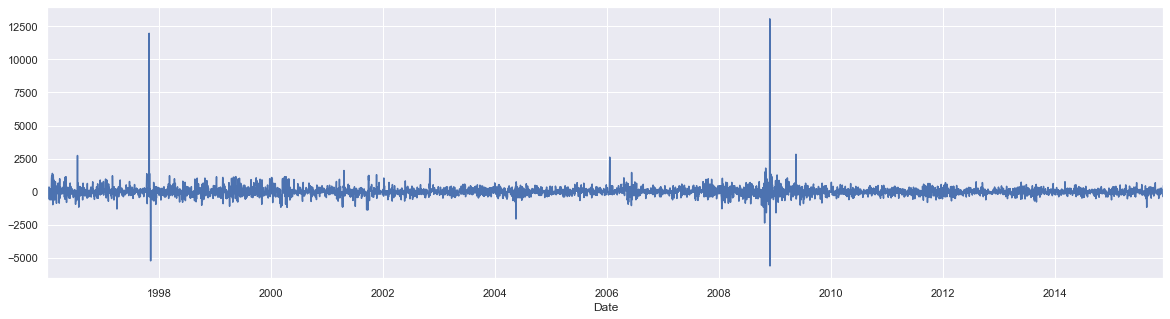

In [144]:
df.res_norm_ret_ma_7.plot(figsize = (20, 5))

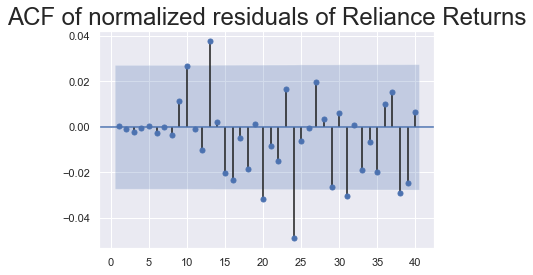

In [145]:
sgt.plot_acf(df.res_norm_ret_ma_7, lags = 40, zero = False)
plt.title("ACF of normalized residuals of Reliance Returns", size=24)
plt.show()

In [146]:
sts.adfuller(df.res_norm_ret_ma_7)

(-72.07311044905256,
 0.0,
 0,
 5202,
 {'1%': -3.4316076950732763,
  '5%': -2.862095769972579,
  '10%': -2.5670658362138834},
 76899.6164943742)

In [147]:
df.res_norm_ret_ma_7.mean()

-0.05636479477527311

In [148]:
df.res_norm_ret_ma_7.var()

170580.71409413745

# MA Models for Prices

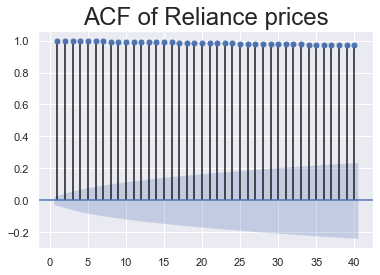

In [149]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF of Reliance prices", size=24)
plt.show()

In [150]:
model_ma_1 = ARMA(df.market_value, order = (0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5203
Model:                     ARMA(0, 1)   Log Likelihood              -31802.546
Method:                       css-mle   S.D. of innovations            109.197
Date:                Thu, 14 Jan 2021   AIC                          63611.091
Time:                        19:16:14   BIC                          63630.762
Sample:                    01-02-1996   HQIC                         63617.972
                         - 12-10-2015                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                244.0610      2.975     82.046      0.000     238.231     249.891
ma.L1.market_value     0.9652      0.002    396.466      0.000       0.960       0.970
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0361           +0.0000j            1.0361            0.5000
-----------------------------------------------------------------------------
"""

# ARMA (1,1)

In [151]:
model_ret_ar_1_ma_1 = ARMA(df.returns, order = (1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(1, 1)   Log Likelihood              -13353.792
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26715.584
Time:                        19:16:16   BIC                          26741.812
Sample:                    01-02-1996   HQIC                         26724.758
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.040      2.780      0.005       0.033       0.189
ar.L1.returns     0.1911      0.227      0.842      0.400      -0.254       0.636
ma.L1.returns    -0.2623      0.223     -1.174      0.240      -0.700       0.176
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.2338           +0.0000j            5.2338            0.0000
MA.1            3.8130           +0.0000j            3.8130            0.0000
-----------------------------------------------------------------------------
"""

In [152]:
LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1)

0.234

In [153]:
LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1)

0.383

# Higher lag ARMA Models

In [154]:
model_ret_ar_7_ma_7 = ARMA(df.returns, order = (7,7))
results_ret_ar_7_ma_7 = model_ret_ar_7_ma_7.fit()
results_ret_ar_7_ma_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(7, 7)   Log Likelihood              -13317.767
Method:                       css-mle   S.D. of innovations              3.129
Date:                Thu, 14 Jan 2021   AIC                          26667.535
Time:                        19:16:42   BIC                          26772.446
Sample:                    01-02-1996   HQIC                         26704.231
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1109      0.036      3.044      0.002       0.039       0.182
ar.L1.returns     0.1808      0.139      1.300      0.194      -0.092       0.454
ar.L2.returns    -0.1015      0.114     -0.889      0.374      -0.325       0.122
ar.L3.returns    -0.2768      0.099     -2.800      0.005      -0.471      -0.083
ar.L4.returns     0.0261      0.101      0.260      0.795      -0.171       0.224
ar.L5.returns     0.2487      0.096      2.586      0.010       0.060       0.437
ar.L6.returns    -0.5710      0.109     -5.216      0.000      -0.785      -0.356
ar.L7.returns    -0.0041      0.149     -0.027      0.978      -0.297       0.289
ma.L1.returns    -0.2561      0.138     -1.849      0.064      -0.528       0.015
ma.L2.returns     0.1060      0.115      0.918      0.359      -0.120       0.332
ma.L3.returns     0.2667      0.100      2.670      0.008       0.071       0.462
ma.L4.returns    -0.0393      0.101     -0.388      0.698      -0.237       0.159
ma.L5.returns    -0.2723      0.096     -2.838      0.005      -0.460      -0.084
ma.L6.returns     0.5697      0.112      5.099      0.000       0.351       0.789
ma.L7.returns    -0.1170      0.148     -0.793      0.428      -0.406       0.172
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9389           -0.5434j            1.0848           -0.4165
AR.2           -0.9389           +0.5434j            1.0848            0.4165
AR.3            0.1694           -1.0410j            1.0547           -0.2243
AR.4            0.1694           +1.0410j            1.0547            0.2243
AR.5            0.9864           -0.6008j            1.1549           -0.0871
AR.6            0.9864           +0.6008j            1.1549            0.0871
AR.7         -141.2321           -0.0000j          141.2321           -0.5000
MA.1           -0.9255           -0.5293j            1.0662           -0.4173
MA.2           -0.9255           +0.5293j            1.0662            0.4173
MA.3            0.1610           -1.0654j            1.0775           -0.2261
MA.4            0.1610           +1.0654j            1.0775            0.2261
MA.5            1.0261           -0.6614j            1.2208           -0.0911
MA.6            1.0261           +0.6614j            1.2208            0.0911
MA.7            4.3450           -0.0000j            4.3450           -0.0000
-----------------------------------------------------------------------------
"""

In [155]:
# more than half of the coefficients are not significant. So we'll start with ARMA(3,3) since less than
# half the coefficients were significant.

In [156]:
model_ret_ar_3_ma_3 = ARMA(df.returns, order = (3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(3, 3)   Log Likelihood              -13339.504
Method:                       css-mle   S.D. of innovations              3.142
Date:                Thu, 14 Jan 2021   AIC                          26695.008
Time:                        19:16:59   BIC                          26747.464
Sample:                    01-02-1996   HQIC                         26713.356
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1106      0.040      2.745      0.006       0.032       0.190
ar.L1.returns     0.1421      0.181      0.784      0.433      -0.213       0.497
ar.L2.returns    -0.8857      0.073    -12.119      0.000      -1.029      -0.742
ar.L3.returns    -0.1954      0.172     -1.136      0.256      -0.533       0.142
ma.L1.returns    -0.2147      0.183     -1.173      0.241      -0.574       0.144
ma.L2.returns     0.8900      0.078     11.453      0.000       0.738       1.042
ma.L3.returns     0.1190      0.171      0.696      0.486      -0.216       0.454
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1811           -1.0063j            1.0225           -0.2217
AR.2            0.1811           +1.0063j            1.0225            0.2217
AR.3           -4.8944           -0.0000j            4.8944           -0.5000
MA.1            0.1833           -1.0186j            1.0350           -0.2217
MA.2            0.1833           +1.0186j            1.0350            0.2217
MA.3           -7.8431           -0.0000j            7.8431           -0.5000
-----------------------------------------------------------------------------
"""

In [157]:
LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF = 4)

0.0

In [158]:
model_ret_ar_3_ma_2 = ARMA(df.returns, order = (3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(3, 2)   Log Likelihood              -13345.652
Method:                       css-mle   S.D. of innovations              3.146
Date:                Thu, 14 Jan 2021   AIC                          26705.303
Time:                        19:17:14   BIC                          26751.202
Sample:                    01-02-1996   HQIC                         26721.358
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1112      0.029      3.837      0.000       0.054       0.168
ar.L1.returns     0.0643      0.098      0.660      0.509      -0.127       0.255
ar.L2.returns     0.7727      0.084      9.174      0.000       0.608       0.938
ar.L3.returns     0.0275      0.016      1.674      0.094      -0.005       0.060
ma.L1.returns    -0.1377      0.096     -1.428      0.153      -0.327       0.051
ma.L2.returns    -0.7724      0.092     -8.366      0.000      -0.953      -0.591
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0771           +0.0000j            1.0771            0.0000
AR.2           -1.2072           +0.0000j            1.2072            0.5000
AR.3          -27.9694           +0.0000j           27.9694            0.5000
MA.1            1.0522           +0.0000j            1.0522            0.0000
MA.2           -1.2305           +0.0000j            1.2305            0.5000
-----------------------------------------------------------------------------
"""

In [159]:
LLR_test(model_ret_ar_3_ma_2, model_ret_ar_3_ma_3)

0.0

In [160]:
model_ret_ar_2_ma_3 = ARMA(df.returns, order = (2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(2, 3)   Log Likelihood              -13345.595
Method:                       css-mle   S.D. of innovations              3.146
Date:                Thu, 14 Jan 2021   AIC                          26705.191
Time:                        19:17:31   BIC                          26751.090
Sample:                    01-02-1996   HQIC                         26721.245
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1112      0.029      3.838      0.000       0.054       0.168
ar.L1.returns     0.1009      0.091      1.109      0.268      -0.077       0.279
ar.L2.returns     0.7700      0.086      8.994      0.000       0.602       0.938
ma.L1.returns    -0.1749      0.092     -1.898      0.058      -0.355       0.006
ma.L2.returns    -0.7678      0.094     -8.206      0.000      -0.951      -0.584
ma.L3.returns     0.0283      0.017      1.705      0.088      -0.004       0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0760           +0.0000j            1.0760            0.0000
AR.2           -1.2070           +0.0000j            1.2070            0.5000
MA.1            1.0516           +0.0000j            1.0516            0.0000
MA.2           -1.2305           +0.0000j            1.2305            0.5000
MA.3           27.3470           +0.0000j           27.3470            0.0000
-----------------------------------------------------------------------------
"""

In [161]:
LLR_test(model_ret_ar_2_ma_3, model_ret_ar_3_ma_3)

0.0

In [162]:
model_ret_ar_3_ma_1 = ARMA(df.returns, order = (3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(3, 1)   Log Likelihood              -13346.903
Method:                       css-mle   S.D. of innovations              3.146
Date:                Thu, 14 Jan 2021   AIC                          26705.806
Time:                        19:17:48   BIC                          26745.148
Sample:                    01-02-1996   HQIC                         26719.567
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1112      0.029      3.839      0.000       0.054       0.168
ar.L1.returns     0.8775      0.023     37.695      0.000       0.832       0.923
ar.L2.returns     0.0527      0.018      2.849      0.004       0.016       0.089
ar.L3.returns    -0.0030      0.014     -0.209      0.835      -0.031       0.025
ma.L1.returns    -0.9518      0.019    -50.866      0.000      -0.988      -0.915
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0745           +0.0000j            1.0745            0.0000
AR.2          -11.2293           +0.0000j           11.2293            0.5000
AR.3           27.8812           +0.0000j           27.8812            0.0000
MA.1            1.0507           +0.0000j            1.0507            0.0000
-----------------------------------------------------------------------------
"""

In [163]:
LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_3, DF = 2)

0.001

In [164]:
model_ret_ar_1_ma_3 = ARMA(df.returns, order = (1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(1, 3)   Log Likelihood              -13346.897
Method:                       css-mle   S.D. of innovations              3.146
Date:                Thu, 14 Jan 2021   AIC                          26705.793
Time:                        19:18:03   BIC                          26745.135
Sample:                    01-02-1996   HQIC                         26719.554
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1112      0.029      3.839      0.000       0.054       0.168
ar.L1.returns     0.9304      0.024     39.067      0.000       0.884       0.977
ma.L1.returns    -1.0047      0.028    -36.529      0.000      -1.059      -0.951
ma.L2.returns     0.0568      0.020      2.902      0.004       0.018       0.095
ma.L3.returns    -0.0060      0.014     -0.423      0.672      -0.034       0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0748           +0.0000j            1.0748            0.0000
MA.1            1.0509           -0.0000j            1.0509           -0.0000
MA.2            4.2435          -11.9073j           12.6409           -0.1955
MA.3            4.2435          +11.9073j           12.6409            0.1955
-----------------------------------------------------------------------------
"""

In [165]:
LLR_test(model_ret_ar_1_ma_3, model_ret_ar_3_ma_3, DF = 2)

0.001

In [166]:
model_ret_ar_2_ma_2 = ARMA(df.returns, order = (2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(2, 2)   Log Likelihood              -13347.128
Method:                       css-mle   S.D. of innovations              3.147
Date:                Thu, 14 Jan 2021   AIC                          26706.256
Time:                        19:18:19   BIC                          26745.598
Sample:                    01-02-1996   HQIC                         26720.017
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1112      0.029      3.795      0.000       0.054       0.169
ar.L1.returns     0.1455      0.125      1.160      0.246      -0.100       0.391
ar.L2.returns     0.7000      0.107      6.558      0.000       0.491       0.909
ma.L1.returns    -0.2043      0.130     -1.572      0.116      -0.459       0.050
ma.L2.returns    -0.6920      0.116     -5.948      0.000      -0.920      -0.464
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0958           +0.0000j            1.0958            0.0000
AR.2           -1.3037           +0.0000j            1.3037            0.5000
MA.1            1.0635           +0.0000j            1.0635            0.0000
MA.2           -1.3587           +0.0000j            1.3587            0.5000
-----------------------------------------------------------------------------
"""

In [167]:
LLR_test(model_ret_ar_2_ma_2, model_ret_ar_3_ma_3, DF = 2)

0.0

In [168]:
model_ret_ar_2_ma_1 = ARMA(df.returns, order = (2,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
results_ret_ar_2_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(2, 1)   Log Likelihood              -13346.925
Method:                       css-mle   S.D. of innovations              3.147
Date:                Thu, 14 Jan 2021   AIC                          26703.850
Time:                        19:18:33   BIC                          26736.635
Sample:                    01-02-1996   HQIC                         26715.317
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1111      0.029      3.840      0.000       0.054       0.168
ar.L1.returns     0.8782      0.023     38.670      0.000       0.834       0.923
ar.L2.returns     0.0503      0.014      3.474      0.001       0.022       0.079
ma.L1.returns    -0.9526      0.018    -53.379      0.000      -0.988      -0.918
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0727           +0.0000j            1.0727            0.0000
AR.2          -18.5356           +0.0000j           18.5356            0.5000
MA.1            1.0497           +0.0000j            1.0497            0.0000
-----------------------------------------------------------------------------
"""

In [169]:
LLR_test(model_ret_ar_2_ma_1, model_ret_ar_3_ma_3, DF = 3)

0.002

In [170]:
model_ret_ar_1_ma_2 = ARMA(df.returns, order = (1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
results_ret_ar_1_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(1, 2)   Log Likelihood              -13346.986
Method:                       css-mle   S.D. of innovations              3.147
Date:                Thu, 14 Jan 2021   AIC                          26703.972
Time:                        19:18:46   BIC                          26736.757
Sample:                    01-02-1996   HQIC                         26715.440
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1111      0.029      3.840      0.000       0.054       0.168
ar.L1.returns     0.9333      0.022     42.665      0.000       0.890       0.976
ma.L1.returns    -1.0072      0.026    -38.768      0.000      -1.058      -0.956
ma.L2.returns     0.0514      0.015      3.471      0.001       0.022       0.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0715           +0.0000j            1.0715            0.0000
MA.1            1.0490           +0.0000j            1.0490            0.0000
MA.2           18.5312           +0.0000j           18.5312            0.0000
-----------------------------------------------------------------------------
"""

In [171]:
LLR_test(model_ret_ar_1_ma_2, model_ret_ar_3_ma_3, DF = 3)

0.002

In [172]:
# ARMA(2,1) is preferred here

# Residuals for Returns

In [173]:
df['res_ret_ar_2_ma_1'] = results_ret_ar_2_ma_1.resid

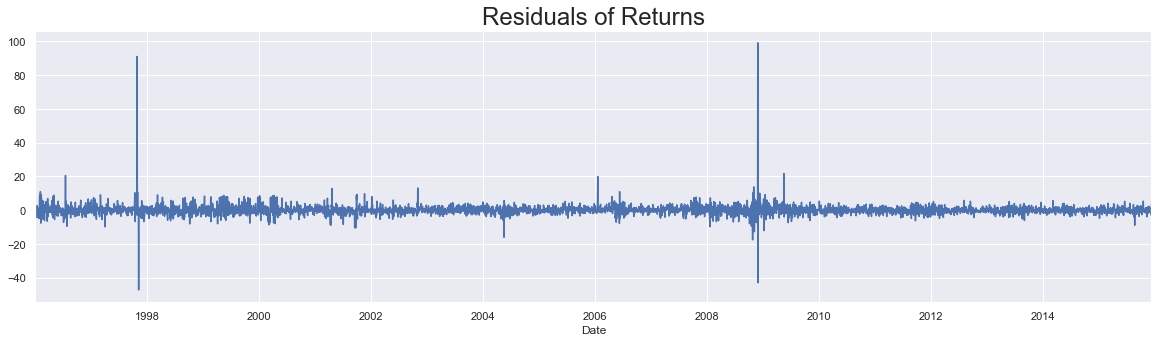

In [174]:
df.res_ret_ar_2_ma_1.plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

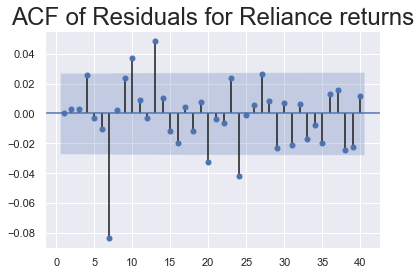

In [175]:
sgt.plot_acf(df.res_ret_ar_2_ma_1, lags = 40, zero = False)
plt.title("ACF of Residuals for Reliance returns", size=24)
plt.show()

In [176]:
df.res_ret_ar_2_ma_1.mean()

-0.00040973408535036613

In [177]:
df.res_ret_ar_2_ma_1.var()

9.90250594175236

In [178]:
sts.adfuller(df.res_ret_ar_2_ma_1)

(-18.87454455275093,
 0.0,
 12,
 5190,
 {'1%': -3.4316106044789336,
  '5%': -2.8620970553537757,
  '10%': -2.567066520468813},
 26440.3377692975)

# Reevaluating Model Selection

In [179]:
model_ret_ar_7_ma_5 = ARMA(df.returns, order = (5,7))
results_ret_ar_7_ma_5 = model_ret_ar_7_ma_5.fit()
results_ret_ar_7_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(5, 7)   Log Likelihood              -13321.862
Method:                       css-mle   S.D. of innovations              3.131
Date:                Thu, 14 Jan 2021   AIC                          26671.725
Time:                        19:19:13   BIC                          26763.523
Sample:                    01-02-1996   HQIC                         26703.834
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1109      0.036      3.076      0.002       0.040       0.182
ar.L1.returns     0.9104      0.179      5.092      0.000       0.560       1.261
ar.L2.returns    -0.7079      0.192     -3.692      0.000      -1.084      -0.332
ar.L3.returns    -0.1279      0.181     -0.705      0.481      -0.484       0.228
ar.L4.returns     0.5468      0.156      3.504      0.000       0.241       0.853
ar.L5.returns    -0.5140      0.108     -4.739      0.000      -0.727      -0.301
ma.L1.returns    -0.9867      0.179     -5.498      0.000      -1.338      -0.635
ma.L2.returns     0.7691      0.204      3.778      0.000       0.370       1.168
ma.L3.returns     0.0692      0.195      0.356      0.722      -0.312       0.451
ma.L4.returns    -0.5294      0.169     -3.138      0.002      -0.860      -0.199
ma.L5.returns     0.5019      0.116      4.312      0.000       0.274       0.730
ma.L6.returns    -0.0362      0.026     -1.418      0.156      -0.086       0.014
ma.L7.returns    -0.0467      0.019     -2.458      0.014      -0.084      -0.009
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2605           -0.0000j            1.2605           -0.5000
AR.2            0.1686           -1.0260j            1.0397           -0.2241
AR.3            0.1686           +1.0260j            1.0397            0.2241
AR.4            0.9936           -0.6637j            1.1948           -0.0937
AR.5            0.9936           +0.6637j            1.1948            0.0937
MA.1            0.1619           -1.0424j            1.0549           -0.2255
MA.2            0.1619           +1.0424j            1.0549            0.2255
MA.3            0.9919           -0.7656j            1.2531           -0.1046
MA.4            0.9919           +0.7656j            1.2531            0.1046
MA.5           -1.3199           -0.0000j            1.3199           -0.5000
MA.6            2.2911           -0.0000j            2.2911           -0.0000
MA.7           -4.0556           -0.0000j            4.0556           -0.5000
-----------------------------------------------------------------------------
"""

In [180]:
# After trying all models from (1,7) to (7,1) none of them have all the coefficients singnificant.
# Therefore, ARMA(2,1) is the preferred model.

# Residuals for the New Model

In [181]:
# leave this section

In [182]:
df['res_ret_ar_7_ma_5'] = results_ret_ar_7_ma_5.resid

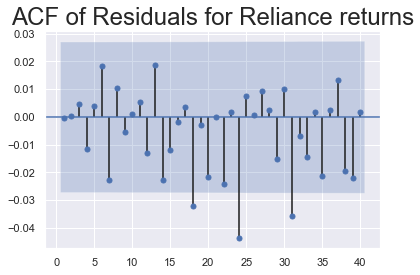

In [183]:
sgt.plot_acf(df.res_ret_ar_7_ma_5, lags = 40, zero = False)
plt.title("ACF of Residuals for Reliance returns", size=24)
plt.show()

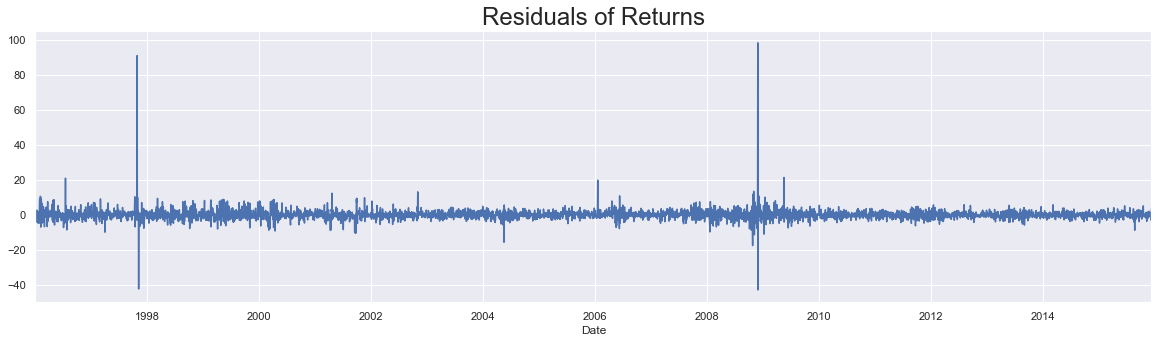

In [184]:
df.res_ret_ar_7_ma_5.plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [185]:
sts.adfuller(df.res_ret_ar_7_ma_5)

(-72.13004776312633,
 0.0,
 0,
 5202,
 {'1%': -3.4316076950732763,
  '5%': -2.862095769972579,
  '10%': -2.5670658362138834},
 26430.109862994188)

# ARIMA(1,1,1)

In [186]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5202
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18669.759
Method:                       css-mle   S.D. of innovations              8.758
Date:                Thu, 14 Jan 2021   AIC                          37347.517
Time:                        19:19:22   BIC                          37373.744
Sample:                    01-03-1996   HQIC                         37356.691
                         - 12-10-2015                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0880      0.089      0.992      0.321      -0.086       0.262
ar.L1.D.market_value     0.4096      0.074      5.518      0.000       0.264       0.555
ma.L1.D.market_value    -0.5689      0.067     -8.441      0.000      -0.701      -0.437
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4413           +0.0000j            2.4413            0.0000
MA.1            1.7576           +0.0000j            1.7576            0.0000
-----------------------------------------------------------------------------
"""

# Residuals of the ARIMA(1,1,1)

In [187]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

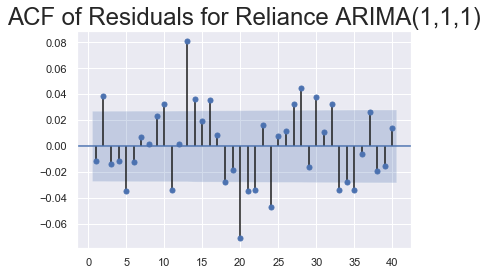

In [188]:
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], lags = 40, zero = False)
plt.title("ACF of Residuals for Reliance ARIMA(1,1,1)", size=24)
plt.show()

# Higher Lag ARIMA Models

In [189]:
# Models which have all the coefficients significant between order ARIMA(1,1,1) and ARIMA(5,1,5) (till order 5 because in the
# ACF above 5th lag is significant) -

# 1) (1,1,1)
# 2) (4,1,5)
# 3) (3,1,5)
# 4) (5,1,4)
# 5) (5,1,3)
# 6) (4,1,3)
# 7) (3,1,4)
# 8) (3,1,2)
# 9) (2,1,3)
# 10) (1,1,3)
# 11) (2,1,1)
# 12) (1,1,2)

In [190]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1, 1, 1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
model_ar_4_i_1_ma_5 = ARIMA(df.market_value, order = (4, 1, 5))
results_ar_4_i_1_ma_5 = model_ar_4_i_1_ma_5.fit()
model_ar_3_i_1_ma_5 = ARIMA(df.market_value, order = (3, 1, 5))
results_ar_3_i_1_ma_5 = model_ar_3_i_1_ma_5.fit()
model_ar_5_i_1_ma_4 = ARIMA(df.market_value, order = (5, 1, 4))
results_ar_5_i_1_ma_4 = model_ar_5_i_1_ma_4.fit()
model_ar_5_i_1_ma_3 = ARIMA(df.market_value, order = (5, 1, 3))
results_ar_5_i_1_ma_3 = model_ar_5_i_1_ma_3.fit()
model_ar_4_i_1_ma_3 = ARIMA(df.market_value, order = (4, 1, 3))
results_ar_4_i_1_ma_3 = model_ar_4_i_1_ma_3.fit()
model_ar_3_i_1_ma_4 = ARIMA(df.market_value, order = (3, 1, 4))
results_ar_3_i_1_ma_4 = model_ar_3_i_1_ma_4.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order = (3, 1, 2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
model_ar_2_i_1_ma_3 = ARIMA(df.market_value, order = (2, 1, 3))
results_ar_2_i_1_ma_3 = model_ar_2_i_1_ma_3.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order = (1, 1, 3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order = (2, 1, 1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order = (1, 1, 2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

In [191]:
print("ARIMA(1,1,1): \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(4,1,5): \t LL = ", results_ar_4_i_1_ma_5.llf, "\t AIC = ", results_ar_4_i_1_ma_5.aic)
print("ARIMA(3,1,5): \t LL = ", results_ar_3_i_1_ma_5.llf, "\t AIC = ", results_ar_3_i_1_ma_5.aic)
print("ARIMA(5,1,4): \t LL = ", results_ar_5_i_1_ma_4.llf, "\t AIC = ", results_ar_5_i_1_ma_4.aic)
print("ARIMA(5,1,3): \t LL = ", results_ar_5_i_1_ma_3.llf, "\t AIC = ", results_ar_5_i_1_ma_3.aic)
print("ARIMA(4,1,3): \t LL = ", results_ar_4_i_1_ma_3.llf, "\t AIC = ", results_ar_4_i_1_ma_3.aic)
print("ARIMA(3,1,4): \t LL = ", results_ar_3_i_1_ma_4.llf, "\t AIC = ", results_ar_3_i_1_ma_4.aic)
print("ARIMA(3,1,2): \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)
print("ARIMA(2,1,3): \t LL = ", results_ar_2_i_1_ma_3.llf, "\t AIC = ", results_ar_2_i_1_ma_3.aic)
print("ARIMA(1,1,3): \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1): \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(1,1,2): \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)

ARIMA(1,1,1): 	 LL =  -18669.758643541234 	 AIC =  37347.51728708247
ARIMA(4,1,5): 	 LL =  -18621.708838514962 	 AIC =  37265.417677029924
ARIMA(3,1,5): 	 LL =  -18656.17175239456 	 AIC =  37332.34350478912
ARIMA(5,1,4): 	 LL =  -18629.25193866623 	 AIC =  37280.50387733246
ARIMA(5,1,3): 	 LL =  -18656.023263405168 	 AIC =  37332.046526810336
ARIMA(4,1,3): 	 LL =  -18637.58415758998 	 AIC =  37293.16831517996
ARIMA(3,1,4): 	 LL =  -18636.241866523484 	 AIC =  37290.48373304697
ARIMA(3,1,2): 	 LL =  -18637.62435846082 	 AIC =  37289.24871692164
ARIMA(2,1,3): 	 LL =  -18636.62604305484 	 AIC =  37287.25208610968
ARIMA(1,1,3): 	 LL =  -18663.80989978979 	 AIC =  37339.61979957958
ARIMA(2,1,1): 	 LL =  -18665.484172670618 	 AIC =  37340.968345341236
ARIMA(1,1,2): 	 LL =  -18666.120292952284 	 AIC =  37342.24058590457


In [192]:
# Clearly the winner here is ARIMA(4,1,5) as it has the highest LL and lowest AIC.

In [193]:
# We need to check LLR for the models which are nested under ARIMA(4,1,5) to make sure ARIMA(4,1,5) significantly outperforms them.

In [194]:
print(LLR_test(model_ar_1_i_1_ma_1, model_ar_4_i_1_ma_5, DF = 7))
print(LLR_test(model_ar_3_i_1_ma_5, model_ar_4_i_1_ma_5, DF = 1))
print(LLR_test(model_ar_4_i_1_ma_3, model_ar_4_i_1_ma_5, DF = 2))
print(LLR_test(model_ar_3_i_1_ma_4, model_ar_4_i_1_ma_5, DF = 2))
print(LLR_test(model_ar_3_i_1_ma_2, model_ar_4_i_1_ma_5, DF = 4))
print(LLR_test(model_ar_2_i_1_ma_3, model_ar_4_i_1_ma_5, DF = 4))
print(LLR_test(model_ar_1_i_1_ma_3, model_ar_4_i_1_ma_5, DF = 5))
print(LLR_test(model_ar_2_i_1_ma_1, model_ar_4_i_1_ma_5, DF = 6))
print(LLR_test(model_ar_1_i_1_ma_2, model_ar_4_i_1_ma_5, DF = 6))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [195]:
# we can see ARIMA(4,1,5) is the clear winner here

In [196]:
df['res_ar_4_i_1_ma_5'] = results_ar_4_i_1_ma_5.resid

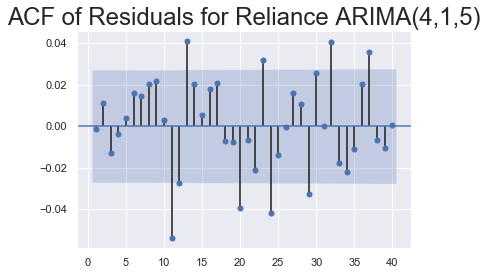

In [197]:
sgt.plot_acf(df.res_ar_4_i_1_ma_5[1:], lags = 40, zero = False)
plt.title("ACF of Residuals for Reliance ARIMA(4,1,5)", size=24)
plt.show()

In [198]:
model_ar_11_i_1_ma_11 = ARIMA(df.market_value, order = (11, 1, 11))
results_ar_11_i_1_ma_11 = model_ar_11_i_1_ma_11.fit(start_ar_lags = 27)
results_ar_11_i_1_ma_11.summary()

C:\Users\intal\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5202
Model:               ARIMA(11, 1, 11)   Log Likelihood              -18586.250
Method:                       css-mle   S.D. of innovations              8.618
Date:                Thu, 14 Jan 2021   AIC                          37220.500
Time:                        19:37:58   BIC                          37377.863
Sample:                    01-03-1996   HQIC                         37275.543
                         - 12-10-2015                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0882      0.094      0.940      0.347      -0.096       0.272
ar.L1.D.market_value      0.5150      0.126      4.073      0.000       0.267       0.763
ar.L2.D.market_value      0.4923      0.099      4.992      0.000       0.299       0.686
ar.L3.D.market_value     -0.1983      0.045     -4.359      0.000      -0.287      -0.109
ar.L4.D.market_value      0.0850      0.032      2.657      0.008       0.022       0.148
ar.L5.D.market_value     -0.4265      0.033    -12.926      0.000      -0.491      -0.362
ar.L6.D.market_value     -0.1217      0.056     -2.180      0.029      -0.231      -0.012
ar.L7.D.market_value     -0.3546      0.020    -17.423      0.000      -0.395      -0.315
ar.L8.D.market_value     -0.1261      0.056     -2.247      0.025      -0.236      -0.016
ar.L9.D.market_value      0.9874      0.038     25.893      0.000       0.913       1.062
ar.L10.D.market_value    -0.3614      0.124     -2.911      0.004      -0.605      -0.118
ar.L11.D.market_value    -0.2748      0.073     -3.742      0.000      -0.419      -0.131
ma.L1.D.market_value     -0.6977      0.128     -5.462      0.000      -0.948      -0.447
ma.L2.D.market_value     -0.4350      0.116     -3.751      0.000      -0.662      -0.208
ma.L3.D.market_value      0.2537      0.040      6.323      0.000       0.175       0.332
ma.L4.D.market_value     -0.0740      0.037     -1.994      0.046      -0.147      -0.001
ma.L5.D.market_value      0.4311      0.029     14.850      0.000       0.374       0.488
ma.L6.D.market_value      0.0378      0.057      0.659      0.510      -0.075       0.150
ma.L7.D.market_value      0.3547      0.020     17.539      0.000       0.315       0.394
ma.L8.D.market_value      0.0461      0.054      0.850      0.395      -0.060       0.152
ma.L9.D.market_value     -1.0386      0.033    -31.771      0.000      -1.103      -0.975
ma.L10.D.market_value     0.5319      0.132      4.038      0.000       0.274       0.790
ma.L11.D.market_value     0.2050      0.091      2.258      0.024       0.027       0.383
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.4620j            1.0204           -0.0748
AR.2             0.9098           +0.4620j            1.0204            0.0748
AR.3             1.0383           -0.4242j            1.1216           -0.0617
AR.4             1.0383           +0.4242j            1.1216            0.0617
AR.5             0.1904           -0.9866j            1.0048           -0.2197
AR.6             0.1904           +0.9866j            1.0048            0.2197
AR.7            -0.4926           -0.8807j            1.0091           -0.3312
AR.8            -0.4926         

In [199]:
# ARIMA(11,1,11) does not have all the coefficients significant

# Models with Higher Levels of Integration

In [200]:
df['delta_prices'] = df.market_value.diff(1)

In [201]:
sts.adfuller(df.delta_prices[1:])

(-12.12196494842233,
 1.8165992476497852e-22,
 31,
 5170,
 {'1%': -3.4316154835165014,
  '5%': -2.8620992109194425,
  '10%': -2.5670676679549103},
 37020.32634609189)

In [202]:
# stationarity is achieved using single level of integration. No need for additional layers of integration

# Preparing Nifty index as exog variable

In [203]:
df_nifty = pd.read_csv("C:\\Users\\intal\\Jupyter_notebooks\\time_series\\individual_stocks\\NIFTY_50.csv")

In [204]:
df_nifty.Date = pd.to_datetime(df_nifty.Date, dayfirst=True)

In [205]:
df_nifty = df_nifty.iloc[::-1]

In [206]:
df_nifty.head()

,Date,Open,High,Low,Close
6205,1996-01-01,913.11,913.11,906.15,908.01
6204,1996-01-02,906.78,906.78,899.52,900.38
6203,1996-01-03,901.66,904.48,895.48,895.96
6202,1996-01-04,891.37,891.37,884.10,889.67
6201,1996-01-05,887.79,887.79,881.74,884.73


In [207]:
df_nifty.set_index("Date", inplace=True)

In [208]:
df_nifty.head()

,Open,High,Low,Close
Date,,,,
1996-01-01,913.11,913.11,906.15,908.01
1996-01-02,906.78,906.78,899.52,900.38
1996-01-03,901.66,904.48,895.48,895.96
1996-01-04,891.37,891.37,884.10,889.67
1996-01-05,887.79,887.79,881.74,884.73


In [209]:
df_nifty = df_nifty.asfreq('b')

In [210]:
df_nifty.isna().sum()

Open     335
High     335
Low      335
Close    334
dtype: int64

In [211]:
df_nifty.Close = df_nifty.Close.fillna(method = "ffill")

In [212]:
df_nifty.isna().sum()

Open     335
High     335
Low      335
Close      0
dtype: int64

In [213]:
df_nifty.Close.describe()

count     6505.000000
mean      4700.033230
std       3477.419946
min        788.150000
25%       1284.750000
50%       4352.300000
75%       7585.000000
max      13258.550000
Name: Close, dtype: float64

In [214]:
df_comp['nifty_index'] = df_nifty.Close

In [215]:
size = int(len(df_nifty)*0.8)
df_11 = df_nifty.iloc[:size]
df_11.tail()

,Open,High,Low,Close
Date,,,,
2015-12-04,7817.60,7821.40,7775.70,7781.9
2015-12-07,7816.55,7825.40,7746.05,7765.4
2015-12-08,7738.50,7771.25,7685.45,7701.7
2015-12-09,7695.50,7702.85,7606.90,7612.5
2015-12-10,7643.30,7691.95,7610.00,7683.3


In [216]:
df['nifty_index'] = df_11.Close[1:]

In [217]:
df.head()

,market_value,wn,rw,returns,norm,norm_ret,res_price,res_ret,res_ret_ma_7,res_norm_ret_ma_7,res_ret_ar_2_ma_1,res_ret_ar_7_ma_5,res_ar_1_i_1_ma_1,res_ar_4_i_1_ma_5,delta_prices,nifty_index
Date,,,,,,,,,,,,,,,,
1996-01-02,15.9434,234.251830,598.521406,-0.777307,100.000000,-102.420780,-0.319864,-0.888320,-0.888413,-117.063656,-0.888450,-0.888179,NaN,NaN,NaN,900.38
1996-01-03,16.0644,-77.937449,593.543244,0.758935,100.758935,100.000000,-0.063013,0.585333,0.584212,76.974519,0.585198,0.586124,0.033033,0.033257,0.1210,895.96
1996-01-04,15.9160,-105.697761,601.605236,-0.923782,99.828142,-121.720846,-0.291217,-1.000890,-0.998883,-131.619787,-1.003302,-1.001653,-0.231660,-0.230996,-0.1484,889.67
1996-01-05,15.8067,125.988338,610.664510,-0.686730,99.142592,-90.486086,-0.284211,-0.874450,-0.872316,-114.942869,-0.874803,-0.877868,-0.230998,-0.233768,-0.1093,884.73
1996-01-08,15.1741,214.798309,632.549794,-4.002100,95.174806,-527.331299,-0.801223,-4.166932,-4.168155,-549.214635,-4.191852,-4.153605,-0.770786,-0.765679,-0.6326,869.70


In [218]:
df_12 = df_nifty.iloc[size:]
df_test['nifty_index'] = df_12.Close
df_test.head()

C:\Users\intal\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,market_value,nifty_index
Date,,
2015-12-11,476.475006,7610.45
2015-12-14,477.549988,7650.05
2015-12-15,487.950012,7700.90
2015-12-16,489.325012,7750.90
2015-12-17,504.850006,7844.35


In [219]:
df_test.tail()

,market_value,nifty_index
Date,,
2020-11-30,1929.800049,12968.95
2020-12-01,1954.900024,13109.05
2020-12-02,1958.150024,13113.75
2020-12-03,1964.050049,13133.90
2020-12-04,1946.750000,13258.55


# ARIMAX

In [220]:
model_ar_1_i_1_ma_1_Xnifty = ARIMA(df.market_value, exog = df.nifty_index, order = (1,1,1))
results_ar_1_i_1_ma_1_Xnifty = model_ar_1_i_1_ma_1_Xnifty.fit()
results_ar_1_i_1_ma_1_Xnifty.summary()

C:\Users\intal\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5202
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18669.736
Method:                       css-mle   S.D. of innovations              8.758
Date:                Thu, 14 Jan 2021   AIC                          37349.471
Time:                        19:38:39   BIC                          37382.255
Sample:                    01-03-1996   HQIC                         37360.939
                         - 12-10-2015                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0608      0.155      0.392      0.695      -0.243       0.365
nifty_index           8.123e-06   3.81e-05      0.213      0.831   -6.65e-05    8.28e-05
ar.L1.D.market_value     0.4096      0.074      5.518      0.000       0.264       0.555
ma.L1.D.market_value    -0.5689      0.067     -8.441      0.000      -0.701      -0.437
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.4417           +0.0000j            2.4417            0.0000
MA.1            1.7578           +0.0000j            1.7578            0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [221]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [222]:
model_sarimax = SARIMAX(df.market_value, exog = df.nifty_index, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5203
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -17389.473
Date:                           Thu, 14 Jan 2021   AIC                          34792.946
Time:                                   19:38:54   BIC                          34838.845
Sample:                               01-02-1996   HQIC                         34809.000
                                    - 12-10-2015                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
nifty_index     0.0992      0.001     99.216      0.000       0.097       0.101
ar.L1           0.9987      0.001   1509.728      0.000       0.997       1.000
ma.L1          -0.3370      0.002   -220.463      0.000      -0.340      -0.334
ar.S.L5         0.9597      0.016     60.209      0.000       0.928       0.991
ar.S.L10        0.0353      0.009      4.005      0.000       0.018       0.053
ma.S.L5        -0.9927      0.013    -75.084      0.000      -1.019      -0.967
sigma2         46.7775      0.071    657.176      0.000      46.638      46.917
===================================================================================
Ljung-Box (Q):                      118.01   Jarque-Bera (JB):          99443375.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.50   Skew:                             9.63
Prob(H) (two-sided):                  0.00   Kurtosis:                       680.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARCH

In [223]:
# creating squared returns
df['sq_returns'] = df.returns.mul(df.returns)

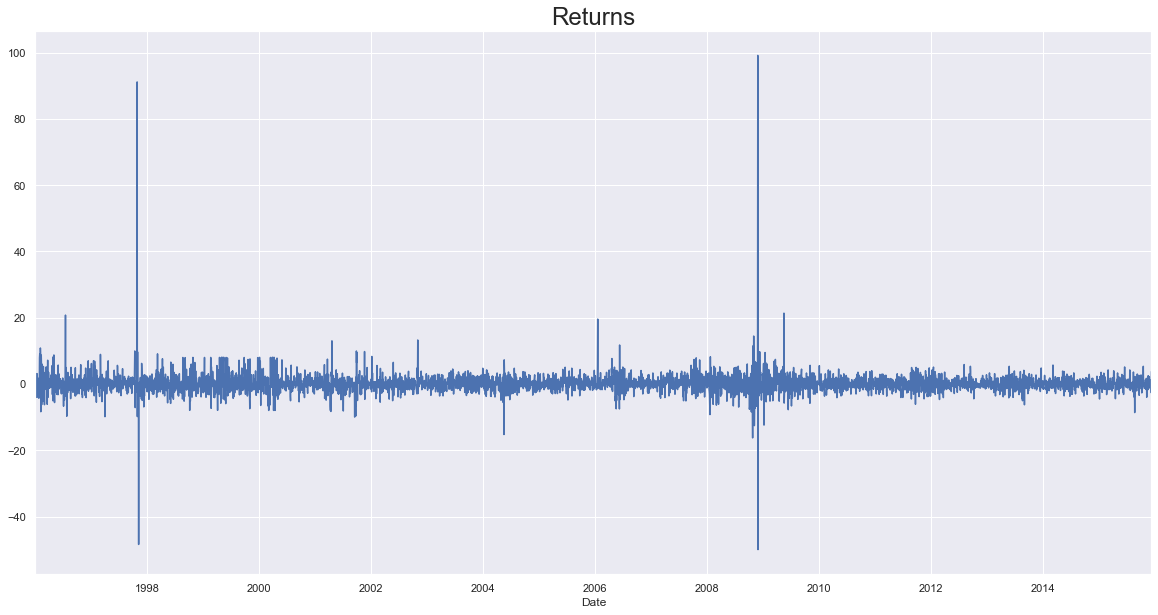

In [224]:
# Returns vs Squared Returns
df.returns.plot(figsize=(20,10))
plt.title("Returns", size=24)
plt.show()

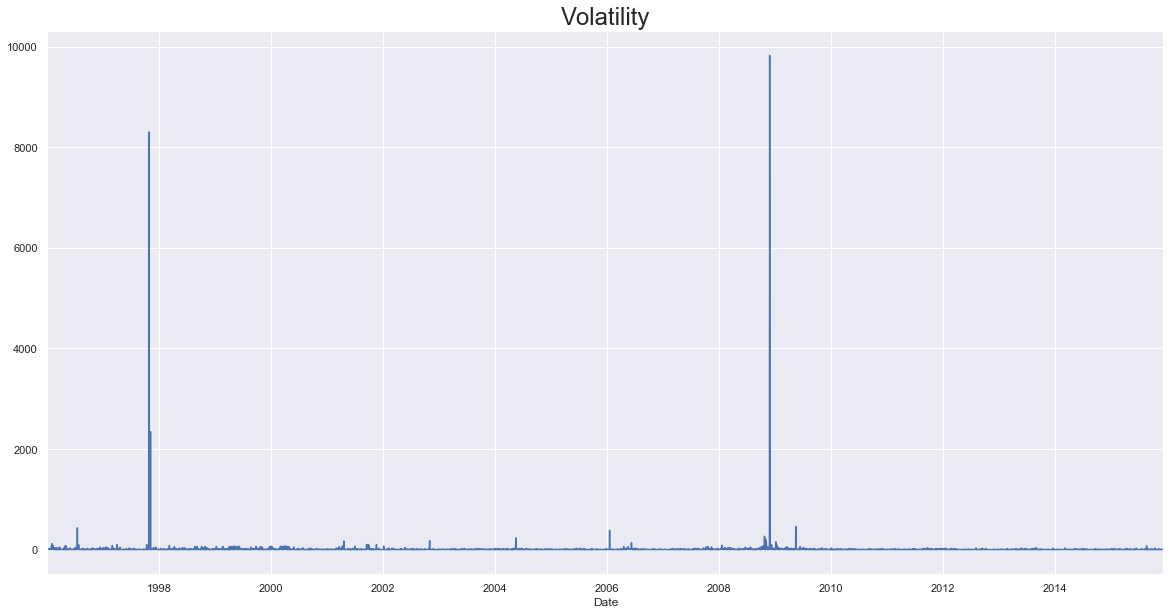

In [225]:
df.sq_returns.plot(figsize=(20,10))
plt.title("Volatility", size=24)
plt.show()

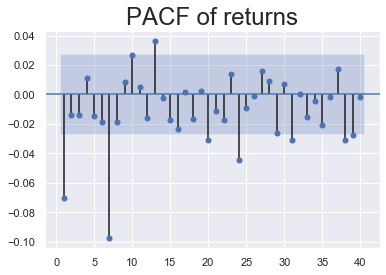

In [226]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, alpha=0.05, method=('ols'))
plt.title("PACF of returns", size=24)
plt.show()

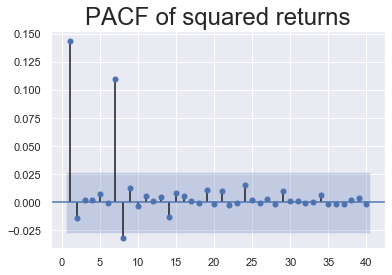

In [227]:
sgt.plot_pacf(df.sq_returns, lags = 40, zero = False, alpha=0.05, method=('ols'))
plt.title("PACF of squared returns", size=24)
plt.show()

# The arch_model() Method

In [228]:
from arch import arch_model

In [229]:
model_arch_1 = arch_model(df.returns)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 12018.588340005506
Iteration:     10,   Func. Count:     69,   Neg. LLF: 12017.86820938503
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12017.868244124578
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -12017.9
Distribution:                  Normal   AIC:                           24043.7
Method:            Maximum Likelihood   BIC:                           24070.0
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5199
Time:                        19:39:06   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1119  2.803e-02      3.994  6.498e-05 [5.701e-02,  0.167]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1203      0.147      0.816      0.414   [ -0.168,  0.409]
alpha[1]       0.1148  1.343e-02      8.544  1.294e-17 [8.845e-02,  0.141]
beta[1]        0.8852  3.673e-02     24.104 2.266e-128   [  0.813,  0.957]
==========================================================================

Covariance estimator: robust
"""

# The Simple ARCH(1)

In [230]:
model_arch_1 = arch_model(df.returns, mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     33,   Neg. LLF: 12462.612706793409
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12461.83247867292
            Iterations: 8
            Function evaluations: 48
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                       ARCH   Log-Likelihood:               -12461.8
Distribution:                  Normal   AIC:                           24929.7
Method:            Maximum Likelihood   BIC:                           24949.3
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5200
Time:                        19:39:06   Df Model:                            3
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2458      0.156      1.574      0.115 [-6.022e-02,  0.552]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.9903      0.281     14.183  1.163e-45   [  3.439,  4.542]
alpha[1]       1.0000      0.472      2.120  3.402e-02 [7.539e-02,  1.925]
==========================================================================

Covariance estimator: robust
"""

# Higher-Lag ARCH Models

In [231]:
model_arch_2 = arch_model(df.returns, mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 12429.768330470702
Iteration:     10,   Func. Count:     72,   Neg. LLF: 12372.191682861692
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12372.130228902352
            Iterations: 12
            Function evaluations: 84
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                       ARCH   Log-Likelihood:               -12372.1
Distribution:                  Normal   AIC:                           24752.3
Method:            Maximum Likelihood   BIC:                           24778.5
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5199
Time:                        19:39:06   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3003      0.148      2.027  4.263e-02 [9.977e-03,  0.591]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.2861      0.312     10.517  7.228e-26   [  2.674,  3.899]
alpha[1]       0.8144      0.405      2.012  4.421e-02 [2.110e-02,  1.608]
alpha[2]       0.1856  6.106e-02      3.040  2.367e-03 [6.594e-02,  0.305]
==========================================================================

Covariance estimator: robust
"""

In [232]:
# looking at the log-likelihood and AIC of ARCH(1) and ARCH(2) we can see ARCH(2) has outperformed.

In [233]:
model_arch_3 = arch_model(df.returns, mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 12490.62607107881
Iteration:     10,   Func. Count:     84,   Neg. LLF: 12363.992904687766
Iteration:     15,   Func. Count:    119,   Neg. LLF: 12363.496123528279
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12363.496122044482
            Iterations: 17
            Function evaluations: 131
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.004
Mean Model:             Constant Mean   Adj. R-squared:                 -0.004
Vol Model:                       ARCH   Log-Likelihood:               -12363.5
Distribution:                  Normal   AIC:                           24737.0
Method:            Maximum Likelihood   BIC:                           24769.8
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5198
Time:                        19:39:06   Df Model:                            5
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.3024      0.149      2.028  4.259e-02 [1.011e-02,  0.595]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          3.1620      0.321      9.838  7.734e-23     [  2.532,  3.792]
alpha[1]       0.8104      0.394      2.058  3.961e-02   [3.854e-02,  1.582]
alpha[2]       0.1516  5.488e-02      2.763  5.725e-03   [4.408e-02,  0.259]
alpha[3]       0.0379  1.934e-02      1.960  4.998e-02 [2.992e-06,7.583e-02]
============================================================================

Covariance estimator: robust
"""

# The simple GARCH model

In [234]:
model_garch_1_1 = arch_model(df.returns, mean = "Constant", vol = 'GARCH', p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit()
results_garch_1_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12079.609670430023
Iteration:      2,   Func. Count:     14,   Neg. LLF: 12076.636900137251
Iteration:      3,   Func. Count:     23,   Neg. LLF: 12075.694220389185
Iteration:      4,   Func. Count:     32,   Neg. LLF: 12075.439560904117
Iteration:      5,   Func. Count:     38,   Neg. LLF: 12018.588340005506
Iteration:      6,   Func. Count:     45,   Neg. LLF: 12018.118352732381
Iteration:      7,   Func. Count:     51,   Neg. LLF: 12017.99877499072
Iteration:      8,   Func. Count:     57,   Neg. LLF: 12017.868588891399
Iteration:      9,   Func. Count:     63,   Neg. LLF: 12017.868214119406
Iteration:     10,   Func. Count:     69,   Neg. LLF: 12017.86820938503
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 12017.868244124578
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -12017.9
Distribution:                  Normal   AIC:                           24043.7
Method:            Maximum Likelihood   BIC:                           24070.0
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5199
Time:                        19:39:07   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1119  2.803e-02      3.994  6.498e-05 [5.701e-02,  0.167]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1203      0.147      0.816      0.414   [ -0.168,  0.409]
alpha[1]       0.1148  1.343e-02      8.544  1.294e-17 [8.845e-02,  0.141]
beta[1]        0.8852  3.673e-02     24.104 2.266e-128   [  0.813,  0.957]
==========================================================================

Covariance estimator: robust
"""

 # Higher-Lag GARCH Models

In [235]:
model_garch_1_2 = arch_model(df.returns, mean = "Constant", vol = 'GARCH', p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit()
results_garch_1_2.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 12090.823958144361
Iteration:      2,   Func. Count:     20,   Neg. LLF: 12059.322823332059
Iteration:      3,   Func. Count:     30,   Neg. LLF: 12058.891098764097
Iteration:      4,   Func. Count:     38,   Neg. LLF: 12045.756388368476
Iteration:      5,   Func. Count:     46,   Neg. LLF: 12033.270535093414
Iteration:      6,   Func. Count:     53,   Neg. LLF: 11937.09057522624
Iteration:      7,   Func. Count:     62,   Neg. LLF: 11936.834180723223
Iteration:      8,   Func. Count:     71,   Neg. LLF: 11935.554851860676
Iteration:      9,   Func. Count:     78,   Neg. LLF: 11932.544882682143
Iteration:     10,   Func. Count:     85,   Neg. LLF: 11925.073331721152
Iteration:     11,   Func. Count:     92,   Neg. LLF: 11925.010655427068
Iteration:     12,   Func. Count:     99,   Neg. LLF: 11925.009606867312
Iteration:     13,   Func. Count:    106,   Neg. LLF: 11925.01053313192
Iteration:     14,   Func. Count:    113,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -11925.0
Distribution:                  Normal   AIC:                           23860.0
Method:            Maximum Likelihood   BIC:                           23892.8
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5198
Time:                        19:39:07   Df Model:                            5
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1146  3.080e-02      3.723  1.970e-04 [5.429e-02,  0.175]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2358      0.159      1.485      0.138   [-7.549e-02,  0.547]
alpha[1]       0.1969  3.743e-02      5.261  1.430e-07      [  0.124,  0.270]
beta[1]    1.9767e-08  2.920e-02  6.769e-07      1.000 [-5.724e-02,5.724e-02]
beta[2]        0.8031  4.121e-02     19.486  1.438e-84      [  0.722,  0.884]
=============================================================================

Covariance estimator: robust
"""

In [236]:
model_garch_1_3 = arch_model(df.returns, mean = "Constant", vol = 'GARCH', p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit()
results_garch_1_3.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 12041.574664051317
Iteration:      2,   Func. Count:     21,   Neg. LLF: 12033.689696560745
Iteration:      3,   Func. Count:     32,   Neg. LLF: 12033.338017449993
Iteration:      4,   Func. Count:     42,   Neg. LLF: 12031.143513863339
Iteration:      5,   Func. Count:     51,   Neg. LLF: 12022.374109210801
Iteration:      6,   Func. Count:     60,   Neg. LLF: 12016.27595665654
Iteration:      7,   Func. Count:     68,   Neg. LLF: 11991.746258187288
Iteration:      8,   Func. Count:     76,   Neg. LLF: 11986.43101278062
Iteration:      9,   Func. Count:     85,   Neg. LLF: 11984.416674327005
Iteration:     10,   Func. Count:     93,   Neg. LLF: 11984.183449702181
Iteration:     11,   Func. Count:    101,   Neg. LLF: 11984.096298567158
Iteration:     12,   Func. Count:    109,   Neg. LLF: 11984.092892790937
Iteration:     13,   Func. Count:    117,   Neg. LLF: 11984.093945247463
Iteration:     14,   Func. Count:    135,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -11984.1
Distribution:                  Normal   AIC:                           23980.2
Method:            Maximum Likelihood   BIC:                           24019.5
                                        No. Observations:                 5203
Date:                Thu, Jan 14 2021   Df Residuals:                     5197
Time:                        19:39:07   Df Model:                            6
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1182  3.226e-02      3.664  2.479e-04 [5.498e-02,  0.181]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2260      0.296      0.763      0.445      [ -0.355,  0.806]
alpha[1]       0.2128  1.853e-02     11.483  1.604e-30      [  0.176,  0.249]
beta[1]        0.4074      0.144      2.838  4.535e-03      [  0.126,  0.689]
beta[2]    3.0176e-10  4.756e-02  6.345e-09      1.000 [-9.321e-02,9.321e-02]
beta[3]        0.3798  4.187e-02      9.070  1.188e-19      [  0.298,  0.462]
=============================================================================

Covariance estimator: robust
"""

In [237]:
# hence we can see garch(1,1) is the best model for measuring volatility of returns. Therefore there's no need to rely on
# overly complicated models.

# Auto-Arima 
# Fitting a model

In [238]:
from pmdarima.arima import auto_arima

In [239]:
model_auto = auto_arima(df.returns)

In [240]:
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [241]:
 model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5203
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -13346.925
Date:                Thu, 14 Jan 2021   AIC                          26703.850
Time:                        19:40:01   BIC                          26736.635
Sample:                             0   HQIC                         26715.317
                               - 5203                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0079      0.004      2.145      0.032       0.001       0.015
ar.L1          0.8783      0.016     55.563      0.000       0.847       0.909
ar.L2          0.0503      0.006      8.643      0.000       0.039       0.062
ma.L1         -0.9527      0.017    -56.334      0.000      -0.986      -0.920
sigma2         9.9005      0.021    465.625      0.000       9.859       9.942
===================================================================================
Ljung-Box (Q):                      107.79   Jarque-Bera (JB):          25111439.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             9.71
Prob(H) (two-sided):                  0.00   Kurtosis:                       342.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Important Arguments

In [242]:
df.head()

,market_value,wn,rw,returns,norm,norm_ret,res_price,res_ret,res_ret_ma_7,res_norm_ret_ma_7,res_ret_ar_2_ma_1,res_ret_ar_7_ma_5,res_ar_1_i_1_ma_1,res_ar_4_i_1_ma_5,delta_prices,nifty_index,sq_returns
Date,,,,,,,,,,,,,,,,,
1996-01-02,15.9434,234.251830,598.521406,-0.777307,100.000000,-102.420780,-0.319864,-0.888320,-0.888413,-117.063656,-0.888450,-0.888179,NaN,NaN,NaN,900.38,0.604206
1996-01-03,16.0644,-77.937449,593.543244,0.758935,100.758935,100.000000,-0.063013,0.585333,0.584212,76.974519,0.585198,0.586124,0.033033,0.033257,0.1210,895.96,0.575982
1996-01-04,15.9160,-105.697761,601.605236,-0.923782,99.828142,-121.720846,-0.291217,-1.000890,-0.998883,-131.619787,-1.003302,-1.001653,-0.231660,-0.230996,-0.1484,889.67,0.853373
1996-01-05,15.8067,125.988338,610.664510,-0.686730,99.142592,-90.486086,-0.284211,-0.874450,-0.872316,-114.942869,-0.874803,-0.877868,-0.230998,-0.233768,-0.1093,884.73,0.471599
1996-01-08,15.1741,214.798309,632.549794,-4.002100,95.174806,-527.331299,-0.801223,-4.166932,-4.168155,-549.214635,-4.191852,-4.153605,-0.770786,-0.765679,-0.6326,869.70,16.016807


In [243]:
df['nifty_index_returns'] = df.nifty_index.pct_change(1)*100

In [244]:
df_comp['returns'] = df_comp.market_value.pct_change(1)*100

In [245]:
df_comp['nifty_index_returns'] = df_comp.nifty_index.pct_change(1)*100
df_comp.head()

,market_value,nifty_index,returns,nifty_index_returns
Date,,,,
1996-01-01,16.0683,908.01,NaN,NaN
1996-01-02,15.9434,900.38,-0.777307,-0.840299
1996-01-03,16.0644,895.96,0.758935,-0.490904
1996-01-04,15.9160,889.67,-0.923782,-0.702040
1996-01-05,15.8067,884.73,-0.686730,-0.555262


In [246]:
model_auto = auto_arima(df_comp.returns[1:], exogenous = df_comp['nifty_index_returns'][1:].values.reshape(-1,1), m=5, max_order = None, max_p = 7, max_q = 7,
                       max_d = 2, max_P = 4, max_Q = 4, max_D = 2, maxiter = 50, alpha = 0.05, n_jobs = -1, trend = 'ct',
                       information_criterion = "oob", out_of_sample_size = int(len(df_comp)*0.2))

C:\Users\intal\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:77: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)


In [247]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:                       y   No. Observations:                 6504
Model:             SARIMAX(1, 0, 0, 5)   Log Likelihood              -15045.612
Date:                 Thu, 14 Jan 2021   AIC                          30101.224
Time:                         19:43:41   BIC                          30135.125
Sample:                              0   HQIC                         30112.949
                                - 6504                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1290      0.058      2.211      0.027       0.015       0.243
drift       -2.21e-05   1.83e-05     -1.206      0.228    -5.8e-05    1.38e-05
x1             1.1170      0.021     51.978      0.000       1.075       1.159
ar.S.L5       -0.0102      0.012     -0.888      0.374      -0.033       0.012
sigma2         5.9497      0.007    814.722      0.000       5.935       5.964
===================================================================================
Ljung-Box (Q):                      201.36   Jarque-Bera (JB):         164844501.12
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            16.43
Prob(H) (two-sided):                  0.00   Kurtosis:                       782.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [248]:
model_auto = auto_arima(df_comp.returns[1:])

In [249]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6504
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -16246.844
Date:                Thu, 14 Jan 2021   AIC                          32499.689
Time:                        19:43:50   BIC                          32520.029
Sample:                             0   HQIC                         32506.724
                               - 6504                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1139      0.041      2.789      0.005       0.034       0.194
ma.L1         -0.0691      0.002    -33.873      0.000      -0.073      -0.065
sigma2         8.6545      0.013    649.873      0.000       8.628       8.681
===================================================================================
Ljung-Box (Q):                      131.45   Jarque-Bera (JB):          35201575.89
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             9.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       362.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fitting a model

In [256]:
model_ar = ARIMA(df.market_value, order=(1,0,0))
results_ar = model_ar.fit() 

# Simple Forecasting

In [257]:
df.tail()

,market_value,wn,rw,returns,norm,norm_ret,res_price,res_ret,res_ret_ma_7,res_norm_ret_ma_7,res_ret_ar_2_ma_1,res_ret_ar_7_ma_5,res_ar_1_i_1_ma_1,res_ar_4_i_1_ma_5,delta_prices,nifty_index,sq_returns,nifty_index_returns
Date,,,,,,,,,,,,,,,,,,
2015-12-04,482.725006,197.142836,NaN,-1.202415,3027.741925,-158.434579,-5.715495,-1.277421,-1.273861,-167.852529,-1.283403,-1.132191,-5.658973,-6.751408,-5.875000,7781.9,1.445802,-1.045885
2015-12-07,476.024994,431.850169,NaN,-1.387956,2985.718191,-182.882166,-7.711757,-1.432621,-1.438500,-189.545874,-1.558645,-1.422696,-7.565096,-8.056280,-6.700012,7765.4,1.926423,-0.212030
2015-12-08,470.450012,-134.643485,NaN,-1.171153,2950.750856,-154.315406,-6.871143,-1.569788,-1.540633,-203.003370,-1.384483,-1.617561,-7.186609,-8.297905,-5.574982,7701.7,1.371600,-0.820305
2015-12-09,457.950012,248.160180,NaN,-2.657030,2872.348508,-350.099992,-13.732662,-3.017523,-2.999128,-395.179916,-2.885521,-3.193873,-14.357119,-15.754515,-12.500000,7612.5,7.059811,-1.158186
2015-12-10,475.174988,163.003238,NaN,3.761322,2980.386793,495.605506,14.440629,3.421664,3.424461,451.215460,3.396946,3.358483,14.124829,13.570386,17.224976,7683.3,14.147546,0.930049


In [272]:
start_date = "2015-12-11"
end_date = "2016-06-13"

In [273]:
df_pred = results_ar.predict(start= start_date, end = end_date)

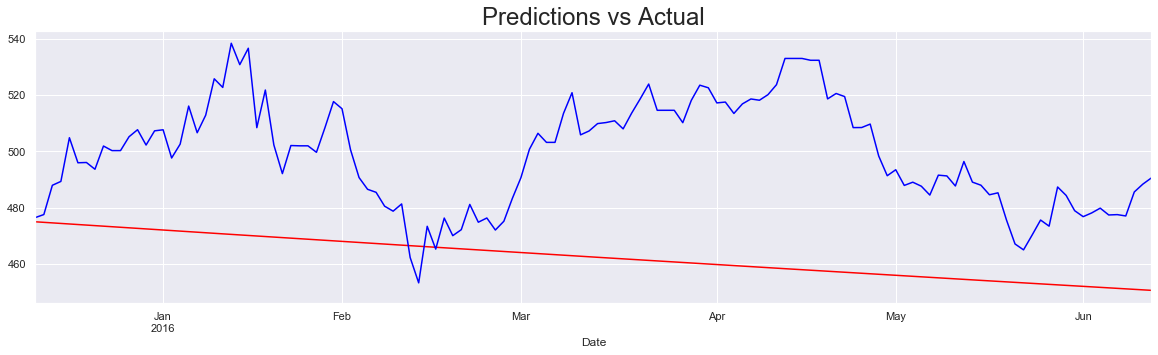

In [274]:
df_pred[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.market_value[start_date:end_date].plot(color = 'blue')
plt.title("Predictions vs Actual", size=24)
plt.show()

# Using Returns Instead

In [278]:
df_test['returns'] = df_test.market_value.pct_change(1)*100

C:\Users\intal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


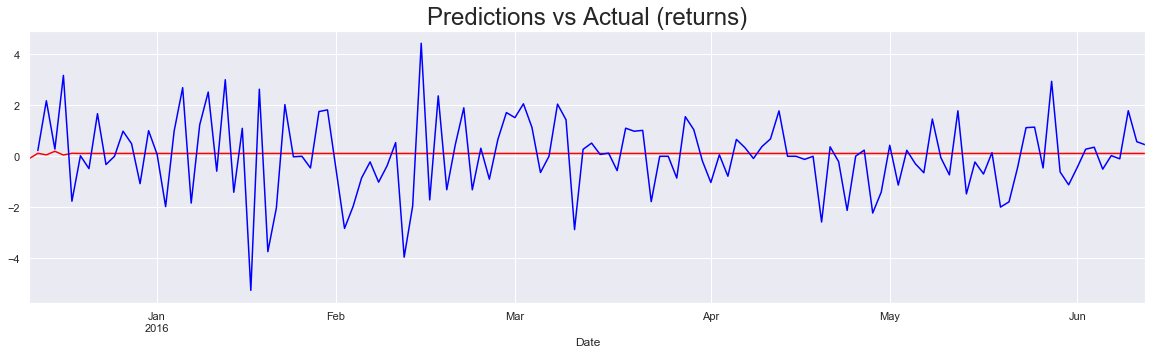

In [282]:
end_date = "2016-06-13"

model_ret_ar = ARIMA(df.returns, order = (5,0,0))
results_ret_ar = model_ret_ar.fit()

df_pred_ar = results_ret_ar.predict(start= start_date, end = end_date)

df_pred_ar[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.returns[start_date:end_date].plot(color = 'blue')
plt.title("Predictions vs Actual (returns)", size=24)
plt.show()

In [281]:
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5203
Model:                     ARMA(1, 0)   Log Likelihood              -13354.500
Method:                       css-mle   S.D. of innovations              3.151
Date:                Thu, 14 Jan 2021   AIC                          26714.999
Time:                        22:35:00   BIC                          26734.670
Sample:                    01-02-1996   HQIC                         26721.880
                         - 12-10-2015                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1107      0.041      2.713      0.007       0.031       0.191
ar.L1.returns    -0.0705      0.014     -5.094      0.000      -0.098      -0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -14.1945           +0.0000j           14.1945            0.5000
-----------------------------------------------------------------------------
"""

# MA

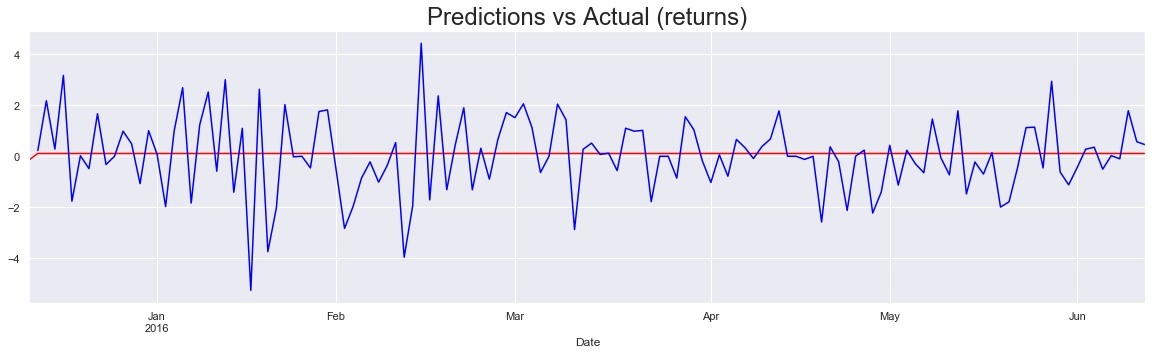

In [288]:
end_date = "2016-06-13"

model_ret_ma = ARIMA(df.returns, order = (0,0,1))
results_ret_ma = model_ret_ma.fit()

df_pred_ma = results_ret_ma.predict(start= start_date, end = end_date)

df_pred_ma[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.returns[start_date:end_date].plot(color = 'blue')
plt.title("Predictions vs Actual (returns)", size=24)
plt.show()

In [289]:
df_pred_ma.head()

2015-12-11   -0.138150
2015-12-14    0.110722
2015-12-15    0.110722
2015-12-16    0.110722
2015-12-17    0.110722
Freq: B, dtype: float64

# ARMA

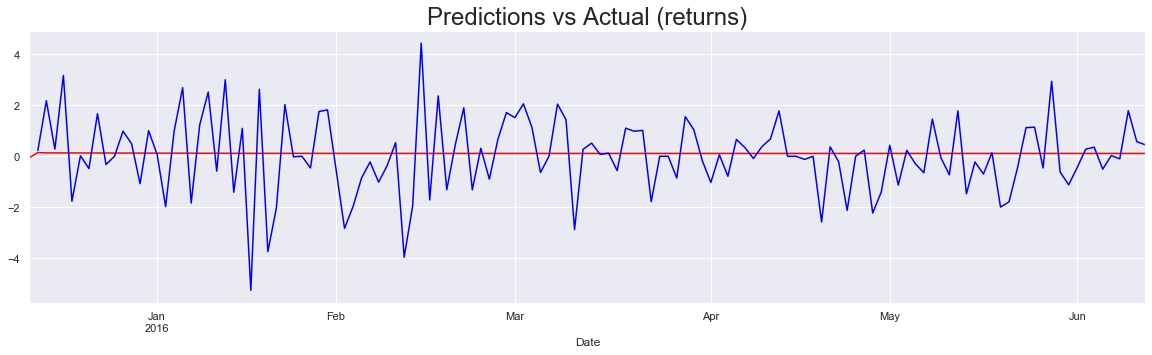

In [296]:
end_date = "2016-06-13"

model_ret_arma = ARIMA(df.returns, order = (2,0,1))
results_ret_arma = model_ret_arma.fit()

df_pred_arma = results_ret_arma.predict(start= start_date, end = end_date)

df_pred_arma[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.returns[start_date:end_date].plot(color = 'blue')
plt.title("Predictions vs Actual (returns)", size=24)
plt.show()

In [297]:
df_pred_arma.head()

2015-12-11   -0.058382
2015-12-14    0.145834
2015-12-15    0.133085
2015-12-16    0.132158
2015-12-17    0.130703
Freq: B, dtype: float64

In [298]:
df_pred_arma.tail()

2016-06-07    0.111147
2016-06-08    0.111147
2016-06-09    0.111147
2016-06-10    0.111146
2016-06-13    0.111146
Freq: B, dtype: float64

# ARMAX

In [300]:
df_test['nifty_returns'] = df_test.nifty_index.pct_change(1)*100

C:\Users\intal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


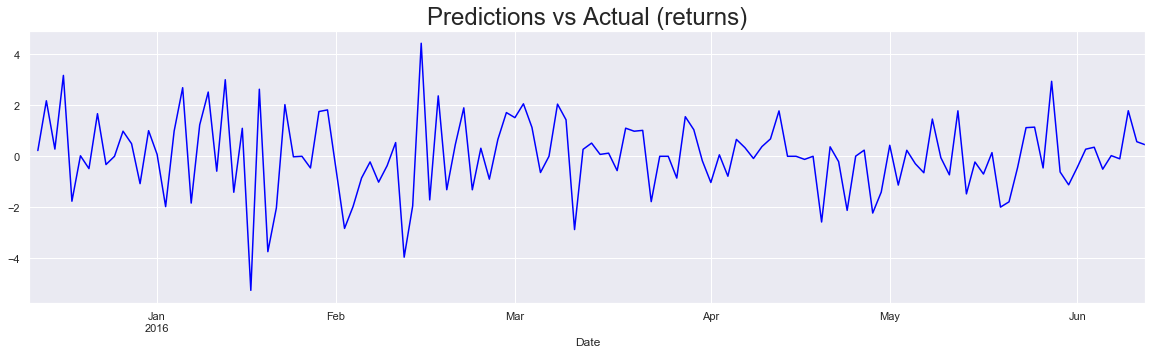

In [314]:
end_date = "2016-06-13"

model_ret_armax = ARIMA(df.returns[1:], exog = df["nifty_index_returns"][1:], order = (2,0,1))
results_ret_armax = model_ret_armax.fit()

df_pred_armax = results_ret_armax.predict(start= start_date, end = end_date,
                                         exog = df_test["nifty_returns"][start_date:end_date])

df_pred_armax[start_date:end_date].plot(figsize=(20,5), color = 'red')
df_test.returns[start_date:end_date].plot(color = 'blue')
plt.title("Predictions vs Actual (returns)", size=24)
plt.show()

In [309]:
df.nifty_index_returns

Date
1996-01-02         NaN
1996-01-03   -0.490904
1996-01-04   -0.702040
1996-01-05   -0.555262
1996-01-08   -1.698823
                ...   
2015-12-04   -1.045885
2015-12-07   -0.212030
2015-12-08   -0.820305
2015-12-09   -1.158186
2015-12-10    0.930049
Freq: B, Name: nifty_index_returns, Length: 5203, dtype: float64

In [312]:
model_ret_armax = ARIMA(df.returns[1:], exog = df.nifty_index_returns[1:], order = (2,0,1))
results_ret_armax = model_ret_armax.fit()
results_ret_armax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5202
Model:                     ARMA(2, 1)   Log Likelihood              -12374.734
Method:                       css-mle   S.D. of innovations              2.611
Date:                Thu, 14 Jan 2021   AIC                          24761.467
Time:                        23:12:08   BIC                          24800.808
Sample:                    01-03-1996   HQIC                         24775.228
                         - 12-10-2015                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0515      0.021      2.449      0.014       0.010       0.093
nifty_index_returns     1.1175      0.023     48.645      0.000       1.072       1.163
ar.L1.returns           0.8253      0.022     37.519      0.000       0.782       0.868
ar.L2.returns           0.0837      0.015      5.637      0.000       0.055       0.113
ma.L1.returns          -0.9473      0.017    -56.336      0.000      -0.980      -0.914
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0910           +0.0000j            1.0910            0.0000
AR.2          -10.9515           +0.0000j           10.9515            0.5000
MA.1            1.0557           +0.0000j            1.0557            0.0000
-----------------------------------------------------------------------------
"""